In [8]:
import pandas as pd
import numpy as np
import os
import csv
import warnings
from datetime import datetime
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Creation of dataframes of the different csv files
dataframes = []
for dirname, _, filenames in os.walk('./datasets/1_SEGMENTATION'):
    for filename in filenames:
        file = filename.replace('.csv', '_df')
        filepath = os.path.join(dirname, filename)
        # Sniff the delimiter using csv.Sniffer
        with open(filepath, 'r', newline='') as csvfile:
            sniffer = csv.Sniffer()
            dialect = sniffer.sniff(csvfile.read(4096))  # Read a sample to sniff
            separator = dialect.delimiter
        # Read the CSV file with the detected separator
        df = pd.read_csv(filepath, sep=separator, encoding="UTF-8")
        globals()[file] = df.copy()
        dataframes.append(df)
        print(file,'-','\n','Rows:',df.shape[0],'\n','Columns:',df.shape[1])
print('Data imported')

RETAIL.txt - 
 Rows: 20 
 Columns: 1
RETAIL_PRODUCT_df - 
 Rows: 2800 
 Columns: 3
RETAIL_REGISTRY_df - 
 Rows: 25727 
 Columns: 4
RETAIL_SALES_df - 
 Rows: 489967 
 Columns: 6
RETAIL_SALES_DETAIL_df - 
 Rows: 2047073 
 Columns: 6
Team Assignment 1 Data_df - 
 Rows: 600 
 Columns: 23
Data imported


In [10]:
# Dataframes
rp_df = RETAIL_PRODUCT_df
rr_df = RETAIL_REGISTRY_df
rs_df = RETAIL_SALES_df
rsd_df = RETAIL_SALES_DETAIL_df

In [11]:
rp_df.isna().sum()

PRODUCT_ID       0
CATEGORY_ID      0
CATEGORY_DESC    0
dtype: int64

In [12]:
rr_df.isna().sum()

CUSTOMER_ID      0
CREATION_DATE    8
REGIONAL_CODE    0
ORIGIN           0
dtype: int64

In [13]:
rs_df.isna().sum()

CUSTOMER_ID           0
DATE                  0
OUTLET_ID             0
PAYMENT_METHOD        0
TIME                  0
TOTAL_POINTS      21868
dtype: int64

In [14]:
rs_df['TOTAL_POINTS'] = rs_df['TOTAL_POINTS'].fillna(0)

In [15]:
rs_df.isna().sum()

CUSTOMER_ID       0
DATE              0
OUTLET_ID         0
PAYMENT_METHOD    0
TIME              0
TOTAL_POINTS      0
dtype: int64

In [16]:
rsd_df.isna().sum()

CUSTOMER_ID          0
DATE                 0
PRODUCT_ID           0
QUANTITY             0
LIST_PRICE       21704
SPECIAL        2043288
dtype: int64

In [17]:
rsd_df['LIST_PRICE'] = rsd_df['LIST_PRICE'].fillna(0)
rsd_df['SPECIAL'] = rsd_df['SPECIAL'].fillna(0)
rsd_df['SPECIAL'].replace({'Y': 1}, inplace=True)

In [18]:
rsd_df.isna().sum()

CUSTOMER_ID    0
DATE           0
PRODUCT_ID     0
QUANTITY       0
LIST_PRICE     0
SPECIAL        0
dtype: int64

In [19]:
main= rsd_df
main = main.merge(rs_df, how = 'inner', on = ['CUSTOMER_ID', 'DATE'] )
main.head()

,CUSTOMER_ID,DATE,PRODUCT_ID,QUANTITY,LIST_PRICE,SPECIAL,OUTLET_ID,PAYMENT_METHOD,TIME,TOTAL_POINTS
0,BF00404312,2020-01-17,1068,1.0,6.85,0,14,CASH,15:06:37,-3960.0
1,BF00404312,2020-01-17,94580,1.0,6.25,0,14,CASH,15:06:37,-3960.0
2,BF00404312,2020-01-17,224046,1.0,4.95,0,14,CASH,15:06:37,-3960.0
3,BF00404312,2020-01-17,17284,1.0,5.25,0,14,CASH,15:06:37,-3960.0
4,BF00404312,2020-01-17,130905,1.0,5.95,0,14,CASH,15:06:37,-3960.0


In [20]:
main = main.merge(rp_df, how = 'inner', on = ['PRODUCT_ID'], )
main.head()

,CUSTOMER_ID,DATE,PRODUCT_ID,QUANTITY,LIST_PRICE,SPECIAL,OUTLET_ID,PAYMENT_METHOD,TIME,TOTAL_POINTS,CATEGORY_ID,CATEGORY_DESC
0,BF00404312,2020-01-17,1068,1.0,6.85,0,14,CASH,15:06:37,-3960.0,3,READY-MADE
1,WG00404070,2020-01-21,1068,4.0,27.40,0,105,CASH,17:24:16,615.0,3,READY-MADE
2,EB00404430,2020-01-26,1068,1.0,6.95,0,14,CASH,09:49:34,-3275.0,3,READY-MADE
3,WD04132126,2019-10-08,1068,1.0,6.85,0,14,DEBIT CARD,16:11:57,1130.0,3,READY-MADE
4,DK00406358,2019-06-08,1068,2.0,13.70,0,14,CASH,17:38:48,385.0,3,READY-MADE


In [21]:
main = main.merge(rr_df, how = 'inner', on = ['CUSTOMER_ID'], )
main.head()

,CUSTOMER_ID,DATE,PRODUCT_ID,QUANTITY,LIST_PRICE,SPECIAL,OUTLET_ID,PAYMENT_METHOD,TIME,TOTAL_POINTS,CATEGORY_ID,CATEGORY_DESC,CREATION_DATE,REGIONAL_CODE,ORIGIN
0,BF00404312,2020-01-17,1068,1.0,6.85,0,14,CASH,15:06:37,-3960.0,3,READY-MADE,2003-04-02,23,WEB
1,BF00404312,2018-11-09,1068,1.0,6.65,0,14,CASH,18:27:53,315.0,3,READY-MADE,2003-04-02,23,WEB
2,BF00404312,2020-01-17,94580,1.0,6.25,0,14,CASH,15:06:37,-3960.0,7,FISH,2003-04-02,23,WEB
3,BF00404312,2019-08-16,94580,1.0,6.25,0,14,CASH,18:49:52,565.0,7,FISH,2003-04-02,23,WEB
4,BF00404312,2019-11-10,94580,1.0,6.25,0,14,CASH,14:20:49,430.0,7,FISH,2003-04-02,23,WEB


In [22]:
# fill NaN values in column 'CREATION_DATE' with the earliest value of 'DATE'column for that CUSTOMER_ID
main['CREATION_DATE'] = main['CREATION_DATE'].fillna(main.groupby('CUSTOMER_ID')['DATE'].transform('min'))

In [23]:
main.isna().sum()

CUSTOMER_ID       0
DATE              0
PRODUCT_ID        0
QUANTITY          0
LIST_PRICE        0
SPECIAL           0
OUTLET_ID         0
PAYMENT_METHOD    0
TIME              0
TOTAL_POINTS      0
CATEGORY_ID       0
CATEGORY_DESC     0
CREATION_DATE     0
REGIONAL_CODE     0
ORIGIN            0
dtype: int64

In [24]:
main[main['PAYMENT_METHOD'].isna()].head(20)

,CUSTOMER_ID,DATE,PRODUCT_ID,QUANTITY,LIST_PRICE,SPECIAL,OUTLET_ID,PAYMENT_METHOD,TIME,TOTAL_POINTS,CATEGORY_ID,CATEGORY_DESC,CREATION_DATE,REGIONAL_CODE,ORIGIN


In [25]:
main['DATE'] = pd.to_datetime(main['DATE'])

In [26]:
main['CREATION_DATE'] = pd.to_datetime(main['CREATION_DATE'], errors='coerce')

In [27]:
specific_date = datetime(2020, 1, 26)

In [28]:
# calculate a new column in anan data frame named CUST_YEAR that contains the longetivity of the customer in years where the longetivity is the difference between the special_date 26.01.2020 and the date the customer was created (CREATION_DATE1)
main['CUST_YEAR'] = (specific_date - main['CREATION_DATE']) // pd.Timedelta(days=365.25)

# if the customer has no CREATION_DATE1 take the earliest DATE value for that CUSTOMER_ID
main['CUST_YEAR'] = main.groupby('CUSTOMER_ID')['CUST_YEAR'].transform(lambda x: x.fillna(x.min()))

# show CUST_YEAR columns
main.head(10)

,CUSTOMER_ID,DATE,PRODUCT_ID,QUANTITY,LIST_PRICE,SPECIAL,OUTLET_ID,PAYMENT_METHOD,TIME,TOTAL_POINTS,CATEGORY_ID,CATEGORY_DESC,CREATION_DATE,REGIONAL_CODE,ORIGIN,CUST_YEAR
0,BF00404312,2020-01-17,1068,1.0,6.85,0,14,CASH,15:06:37,-3960.0,3,READY-MADE,2003-04-02,23,WEB,16
1,BF00404312,2018-11-09,1068,1.0,6.65,0,14,CASH,18:27:53,315.0,3,READY-MADE,2003-04-02,23,WEB,16
2,BF00404312,2020-01-17,94580,1.0,6.25,0,14,CASH,15:06:37,-3960.0,7,FISH,2003-04-02,23,WEB,16
3,BF00404312,2019-08-16,94580,1.0,6.25,0,14,CASH,18:49:52,565.0,7,FISH,2003-04-02,23,WEB,16
4,BF00404312,2019-11-10,94580,1.0,6.25,0,14,CASH,14:20:49,430.0,7,FISH,2003-04-02,23,WEB,16
5,BF00404312,2020-01-17,224046,1.0,4.95,0,14,CASH,15:06:37,-3960.0,11,FRUIT,2003-04-02,23,WEB,16
6,BF00404312,2020-01-17,17284,1.0,5.25,0,14,CASH,15:06:37,-3960.0,11,FRUIT,2003-04-02,23,WEB,16
7,BF00404312,2020-01-17,130905,1.0,5.95,0,14,CASH,15:06:37,-3960.0,11,FRUIT,2003-04-02,23,WEB,16
8,BF00404312,2020-01-17,191721,1.0,6.65,0,14,CASH,15:06:37,-3960.0,3,READY-MADE,2003-04-02,23,WEB,16
9,BF00404312,2019-08-16,191721,2.0,13.30,0,14,CASH,18:49:52,565.0,3,READY-MADE,2003-04-02,23,WEB,16


In [29]:
# Function to extract hour from time string
def extract_hour(time_str):
    return int(time_str.split(':')[0])

# Apply the function to extract hours and create a new column
main['Transaction_Hour'] = main['TIME'].apply(extract_hour)

main.head()


,CUSTOMER_ID,DATE,PRODUCT_ID,QUANTITY,LIST_PRICE,SPECIAL,OUTLET_ID,PAYMENT_METHOD,TIME,TOTAL_POINTS,CATEGORY_ID,CATEGORY_DESC,CREATION_DATE,REGIONAL_CODE,ORIGIN,CUST_YEAR,Transaction_Hour
0,BF00404312,2020-01-17,1068,1.0,6.85,0,14,CASH,15:06:37,-3960.0,3,READY-MADE,2003-04-02,23,WEB,16,15
1,BF00404312,2018-11-09,1068,1.0,6.65,0,14,CASH,18:27:53,315.0,3,READY-MADE,2003-04-02,23,WEB,16,18
2,BF00404312,2020-01-17,94580,1.0,6.25,0,14,CASH,15:06:37,-3960.0,7,FISH,2003-04-02,23,WEB,16,15
3,BF00404312,2019-08-16,94580,1.0,6.25,0,14,CASH,18:49:52,565.0,7,FISH,2003-04-02,23,WEB,16,18
4,BF00404312,2019-11-10,94580,1.0,6.25,0,14,CASH,14:20:49,430.0,7,FISH,2003-04-02,23,WEB,16,14


In [30]:
main['DATE'] = pd.to_datetime(main['DATE'])
main['Weekday'] = main['DATE'].dt.weekday
main.head()

,CUSTOMER_ID,DATE,PRODUCT_ID,QUANTITY,LIST_PRICE,SPECIAL,OUTLET_ID,PAYMENT_METHOD,TIME,TOTAL_POINTS,CATEGORY_ID,CATEGORY_DESC,CREATION_DATE,REGIONAL_CODE,ORIGIN,CUST_YEAR,Transaction_Hour,Weekday
0,BF00404312,2020-01-17,1068,1.0,6.85,0,14,CASH,15:06:37,-3960.0,3,READY-MADE,2003-04-02,23,WEB,16,15,4
1,BF00404312,2018-11-09,1068,1.0,6.65,0,14,CASH,18:27:53,315.0,3,READY-MADE,2003-04-02,23,WEB,16,18,4
2,BF00404312,2020-01-17,94580,1.0,6.25,0,14,CASH,15:06:37,-3960.0,7,FISH,2003-04-02,23,WEB,16,15,4
3,BF00404312,2019-08-16,94580,1.0,6.25,0,14,CASH,18:49:52,565.0,7,FISH,2003-04-02,23,WEB,16,18,4
4,BF00404312,2019-11-10,94580,1.0,6.25,0,14,CASH,14:20:49,430.0,7,FISH,2003-04-02,23,WEB,16,14,6


In [31]:
main['TOTAL_POINTS'] = main['TOTAL_POINTS'].astype(int)

In [32]:
# create a new column that takes 0 if the TOTAL_POINTS column value is positive else takes the TOTAL_POINTS column value directly
main['NEG_POINTS'] = np.where(main['TOTAL_POINTS'] > 0, 0, main['TOTAL_POINTS'])
main.head()




,CUSTOMER_ID,DATE,PRODUCT_ID,QUANTITY,LIST_PRICE,SPECIAL,OUTLET_ID,PAYMENT_METHOD,TIME,TOTAL_POINTS,CATEGORY_ID,CATEGORY_DESC,CREATION_DATE,REGIONAL_CODE,ORIGIN,CUST_YEAR,Transaction_Hour,Weekday,NEG_POINTS
0,BF00404312,2020-01-17,1068,1.0,6.85,0,14,CASH,15:06:37,-3960,3,READY-MADE,2003-04-02,23,WEB,16,15,4,-3960
1,BF00404312,2018-11-09,1068,1.0,6.65,0,14,CASH,18:27:53,315,3,READY-MADE,2003-04-02,23,WEB,16,18,4,0
2,BF00404312,2020-01-17,94580,1.0,6.25,0,14,CASH,15:06:37,-3960,7,FISH,2003-04-02,23,WEB,16,15,4,-3960
3,BF00404312,2019-08-16,94580,1.0,6.25,0,14,CASH,18:49:52,565,7,FISH,2003-04-02,23,WEB,16,18,4,0
4,BF00404312,2019-11-10,94580,1.0,6.25,0,14,CASH,14:20:49,430,7,FISH,2003-04-02,23,WEB,16,14,6,0


In [33]:
# add a LoyaltyPoint column that takes 1 if NEG_POINTS column value is not zero else takes 0
main['LoyaltyPoint'] = np.where(main['NEG_POINTS'] != 0, 1, 0)
main.head()

,CUSTOMER_ID,DATE,PRODUCT_ID,QUANTITY,LIST_PRICE,SPECIAL,OUTLET_ID,PAYMENT_METHOD,TIME,TOTAL_POINTS,CATEGORY_ID,CATEGORY_DESC,CREATION_DATE,REGIONAL_CODE,ORIGIN,CUST_YEAR,Transaction_Hour,Weekday,NEG_POINTS,LoyaltyPoint
0,BF00404312,2020-01-17,1068,1.0,6.85,0,14,CASH,15:06:37,-3960,3,READY-MADE,2003-04-02,23,WEB,16,15,4,-3960,1
1,BF00404312,2018-11-09,1068,1.0,6.65,0,14,CASH,18:27:53,315,3,READY-MADE,2003-04-02,23,WEB,16,18,4,0,0
2,BF00404312,2020-01-17,94580,1.0,6.25,0,14,CASH,15:06:37,-3960,7,FISH,2003-04-02,23,WEB,16,15,4,-3960,1
3,BF00404312,2019-08-16,94580,1.0,6.25,0,14,CASH,18:49:52,565,7,FISH,2003-04-02,23,WEB,16,18,4,0,0
4,BF00404312,2019-11-10,94580,1.0,6.25,0,14,CASH,14:20:49,430,7,FISH,2003-04-02,23,WEB,16,14,6,0,0


In [34]:
# calculate the LoyaltyPoint = 1 percentage for each customer_id in a new table
loyalty_final = main.groupby('CUSTOMER_ID')['LoyaltyPoint'].mean().reset_index()
loyalty_final.head()


,CUSTOMER_ID,LoyaltyPoint
0,AA00312188,0.029412
1,AA00312390,0.068966
2,AA00325975,0.058537
3,AA00336843,0.101449
4,AA00339761,0.033898


In [35]:
# show how many unique customer_id are in the data
main['CUSTOMER_ID'].nunique()


25727

In [36]:
# calculate the absolute sum of NEG_POINTS for each CUSTOMER_ID in a new table
negative_points = main.groupby('CUSTOMER_ID')['NEG_POINTS'].sum().abs().reset_index()
negative_points


,CUSTOMER_ID,NEG_POINTS
0,AA00312188,8760
1,AA00312390,2240
2,AA00325975,80675
3,AA00336843,24255
4,AA00339761,4030
...,...,...
25722,YZ04556116,0
25723,YZ04586406,0
25724,YZ04658257,110880
25725,YZ04743693,0


In [37]:
# Calculate the absolute sum of negative values in the 'TOTAL_POINTS' column for each 'CUSTOMER_ID'
points_spent = main[main['TOTAL_POINTS'] < 0].groupby('CUSTOMER_ID')['TOTAL_POINTS'].sum().abs()

# Convert the result into a data table
points_spent_table = pd.DataFrame({'CUSTOMER_ID': points_spent.index, 'Points_Spent': points_spent.values})

points_spent_table

,CUSTOMER_ID,Points_Spent
0,AA00312188,8760
1,AA00312390,2240
2,AA00325975,80675
3,AA00336843,24255
4,AA00339761,4030
...,...,...
14888,YZ02653377,19860
14889,YZ03066972,28380
14890,YZ03638056,2650
14891,YZ04148156,1080


In [38]:
# show rows that have 0 in points_spent_table
points_spent_table[points_spent_table['Points_Spent'] == 0]


,CUSTOMER_ID,Points_Spent


In [39]:
loyalty = points_spent_table.copy()
loyalty['loyalty_score'] = loyalty['Points_Spent'].apply(lambda x: 1 if x > 0 else 0)
loyalty

,CUSTOMER_ID,Points_Spent,loyalty_score
0,AA00312188,8760,1
1,AA00312390,2240,1
2,AA00325975,80675,1
3,AA00336843,24255,1
4,AA00339761,4030,1
...,...,...,...
14888,YZ02653377,19860,1
14889,YZ03066972,28380,1
14890,YZ03638056,2650,1
14891,YZ04148156,1080,1


In [40]:
# chow rows where loyalty_score is 0
loyalty[loyalty['loyalty_score'] == 0]


,CUSTOMER_ID,Points_Spent,loyalty_score


In [41]:
# merge the loyalty table with the main table
main = main.merge(loyalty, how='inner', on='CUSTOMER_ID')
main.head()

,CUSTOMER_ID,DATE,PRODUCT_ID,QUANTITY,LIST_PRICE,SPECIAL,OUTLET_ID,PAYMENT_METHOD,TIME,TOTAL_POINTS,...,CREATION_DATE,REGIONAL_CODE,ORIGIN,CUST_YEAR,Transaction_Hour,Weekday,NEG_POINTS,LoyaltyPoint,Points_Spent,loyalty_score
0,BF00404312,2020-01-17,1068,1.0,6.85,0,14,CASH,15:06:37,-3960,...,2003-04-02,23,WEB,16,15,4,-3960,1,27720,1
1,BF00404312,2018-11-09,1068,1.0,6.65,0,14,CASH,18:27:53,315,...,2003-04-02,23,WEB,16,18,4,0,0,27720,1
2,BF00404312,2020-01-17,94580,1.0,6.25,0,14,CASH,15:06:37,-3960,...,2003-04-02,23,WEB,16,15,4,-3960,1,27720,1
3,BF00404312,2019-08-16,94580,1.0,6.25,0,14,CASH,18:49:52,565,...,2003-04-02,23,WEB,16,18,4,0,0,27720,1
4,BF00404312,2019-11-10,94580,1.0,6.25,0,14,CASH,14:20:49,430,...,2003-04-02,23,WEB,16,14,6,0,0,27720,1


In [42]:
main['TYPE'] = None
for index, row in main.iterrows():
    if row['QUANTITY'] <= 0 or row['LIST_PRICE'] < 0:
        main.at[index, 'TYPE'] = "RETURN"
    elif row['QUANTITY'] > 0 and row['LIST_PRICE'] == 0:
        main.at[index, 'TYPE'] = "PROMOTION"
    else :
        main.at[index, 'TYPE'] = "BUY"

main.head()

,CUSTOMER_ID,DATE,PRODUCT_ID,QUANTITY,LIST_PRICE,SPECIAL,OUTLET_ID,PAYMENT_METHOD,TIME,TOTAL_POINTS,...,REGIONAL_CODE,ORIGIN,CUST_YEAR,Transaction_Hour,Weekday,NEG_POINTS,LoyaltyPoint,Points_Spent,loyalty_score,TYPE
0,BF00404312,2020-01-17,1068,1.0,6.85,0,14,CASH,15:06:37,-3960,...,23,WEB,16,15,4,-3960,1,27720,1,BUY
1,BF00404312,2018-11-09,1068,1.0,6.65,0,14,CASH,18:27:53,315,...,23,WEB,16,18,4,0,0,27720,1,BUY
2,BF00404312,2020-01-17,94580,1.0,6.25,0,14,CASH,15:06:37,-3960,...,23,WEB,16,15,4,-3960,1,27720,1,BUY
3,BF00404312,2019-08-16,94580,1.0,6.25,0,14,CASH,18:49:52,565,...,23,WEB,16,18,4,0,0,27720,1,BUY
4,BF00404312,2019-11-10,94580,1.0,6.25,0,14,CASH,14:20:49,430,...,23,WEB,16,14,6,0,0,27720,1,BUY


In [43]:
# change TYPE column to categorical
main['TYPE'] = main['TYPE'].astype('category')

In [44]:
# change CATEGORY_DESC to categorical
main['CATEGORY_DESC'] = main['CATEGORY_DESC'].astype('category')

In [45]:
# change PAYMENT_METHOD column to categorical
main['PAYMENT_METHOD'] = main['PAYMENT_METHOD'].astype('category')
main.head()

,CUSTOMER_ID,DATE,PRODUCT_ID,QUANTITY,LIST_PRICE,SPECIAL,OUTLET_ID,PAYMENT_METHOD,TIME,TOTAL_POINTS,...,REGIONAL_CODE,ORIGIN,CUST_YEAR,Transaction_Hour,Weekday,NEG_POINTS,LoyaltyPoint,Points_Spent,loyalty_score,TYPE
0,BF00404312,2020-01-17,1068,1.0,6.85,0,14,CASH,15:06:37,-3960,...,23,WEB,16,15,4,-3960,1,27720,1,BUY
1,BF00404312,2018-11-09,1068,1.0,6.65,0,14,CASH,18:27:53,315,...,23,WEB,16,18,4,0,0,27720,1,BUY
2,BF00404312,2020-01-17,94580,1.0,6.25,0,14,CASH,15:06:37,-3960,...,23,WEB,16,15,4,-3960,1,27720,1,BUY
3,BF00404312,2019-08-16,94580,1.0,6.25,0,14,CASH,18:49:52,565,...,23,WEB,16,18,4,0,0,27720,1,BUY
4,BF00404312,2019-11-10,94580,1.0,6.25,0,14,CASH,14:20:49,430,...,23,WEB,16,14,6,0,0,27720,1,BUY


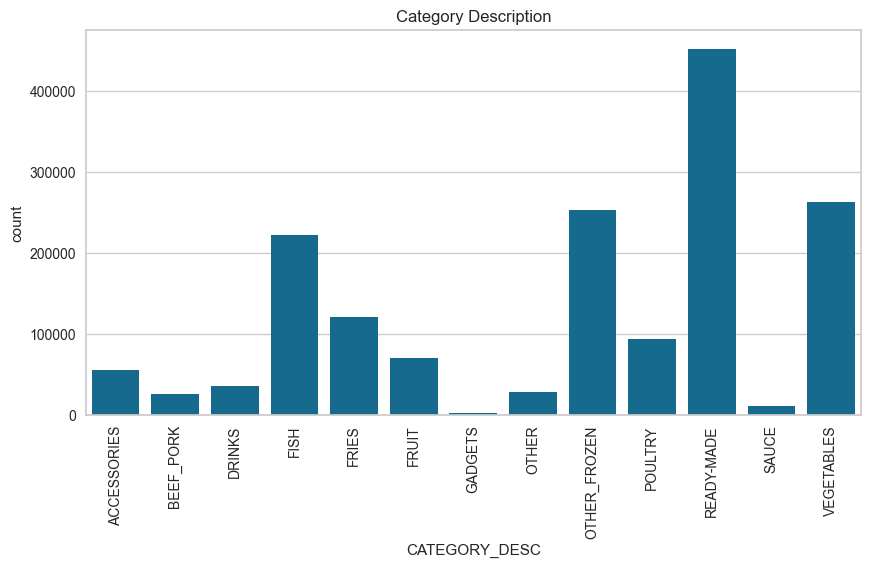

In [46]:
# plot the bar chart of CATEGORY_DESC
plt.figure(figsize=(10, 5))
sns.countplot(x='CATEGORY_DESC', data=main)
plt.title('Category Description')
plt.xticks(rotation=90)
plt.show()

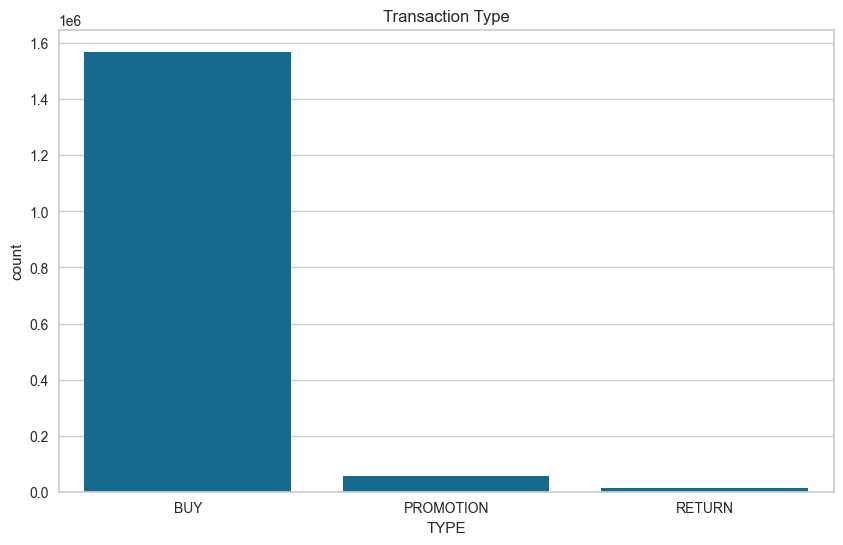

In [47]:
# plot the bar chart of TYPE
plt.figure(figsize=(10, 6))
sns.countplot(x='TYPE', data=main)
plt.title('Transaction Type')
plt.show()

In [48]:
# create a new column TYPE_CATEGORY that contain 0 for RETURN, 1 for PROMOTION, and 2 for BUY in TYPE column
main['TYPE_CATEGORY'] = main['TYPE'].map({'RETURN': 0, 'PROMOTION': 1, 'BUY': 2})



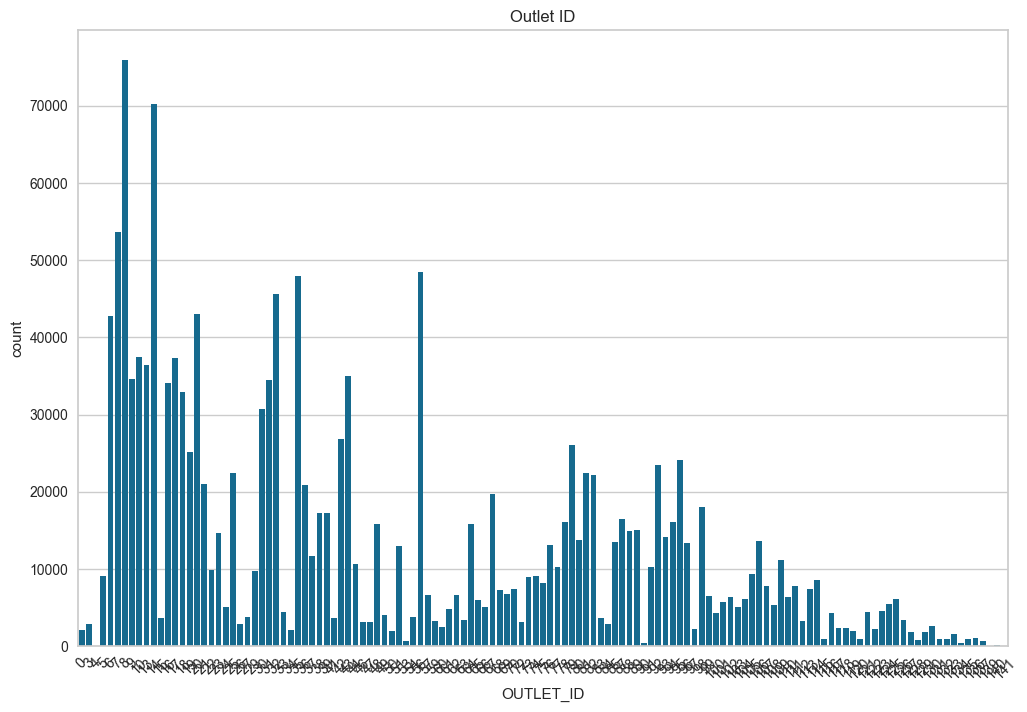

In [49]:
plt.figure(figsize=(12, 8))
sns.countplot(x='OUTLET_ID', data=main)
plt.title('Outlet ID')
plt.xticks(rotation=45)
plt.show()


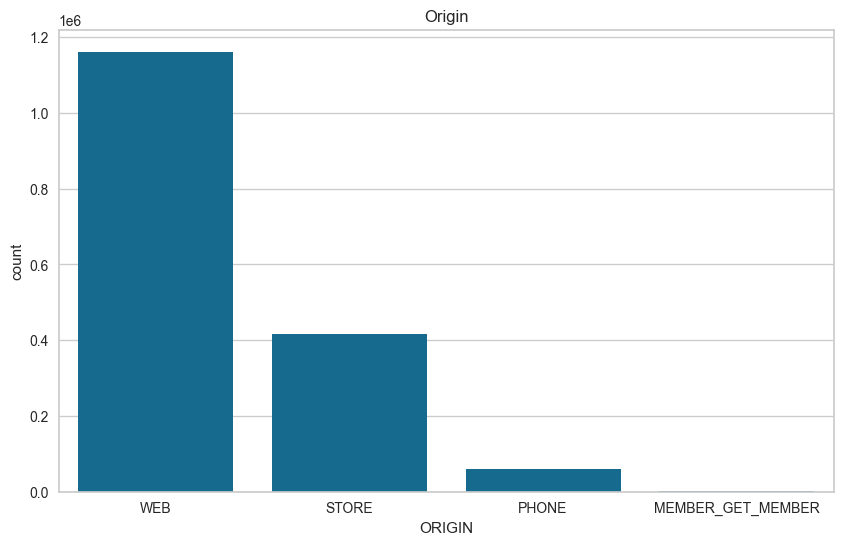

In [50]:
# plot a graph for ORIGIN
plt.figure(figsize=(10, 6))
sns.countplot(x='ORIGIN', data=main)
plt.title('Origin')
plt.show()


In [51]:
# divide ORIGIN into categories in a new column named ORIGIN_CATEGORY
main['ORIGIN_CATEGORY'] = None
main.loc[main['ORIGIN'] == 'WEB', 'ORIGIN_CATEGORY'] = '1'
main.loc[main['ORIGIN'] == 'STORE', 'ORIGIN_CATEGORY'] = '2'
main.loc[main['ORIGIN'] == 'PHONE', 'ORIGIN_CATEGORY'] = '3'
main.loc[main['ORIGIN'] == 'MEMBER_GET_MEMBER', 'ORIGIN_CATEGORY'] = '4'



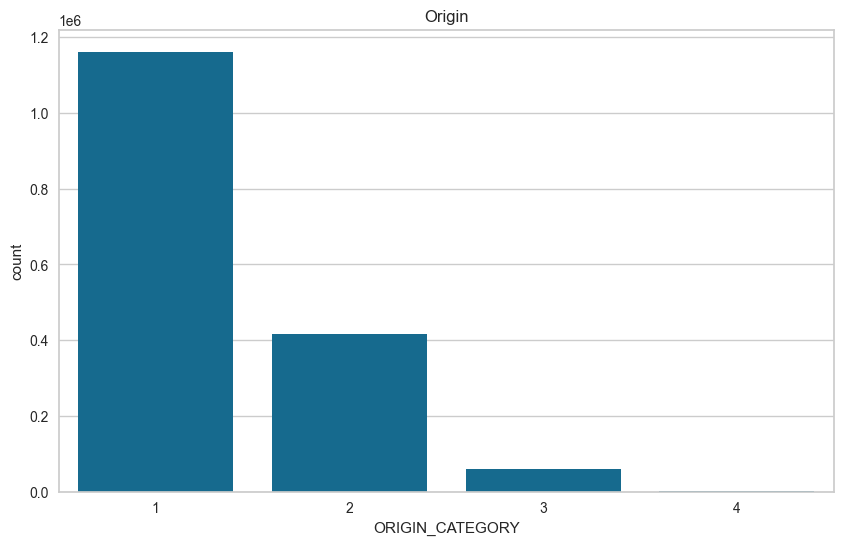

In [52]:
# plot a graph for ORIGIN
plt.figure(figsize=(10, 6))
sns.countplot(x='ORIGIN_CATEGORY', data=main)
plt.title('Origin')
plt.show()

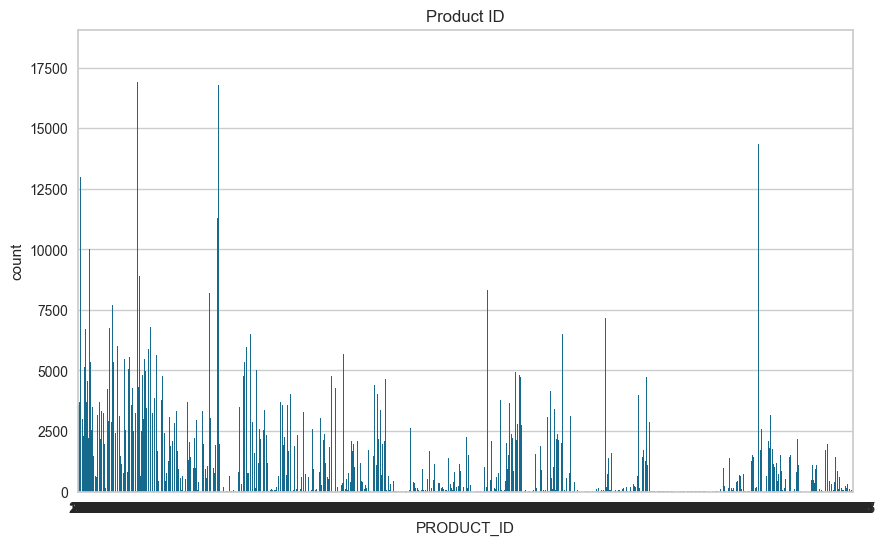

In [53]:
#plot a chart for PRODUCT_ID
plt.figure(figsize=(10, 6))
sns.countplot(x='PRODUCT_ID', data=main)
plt.title('Product ID')
plt.show()


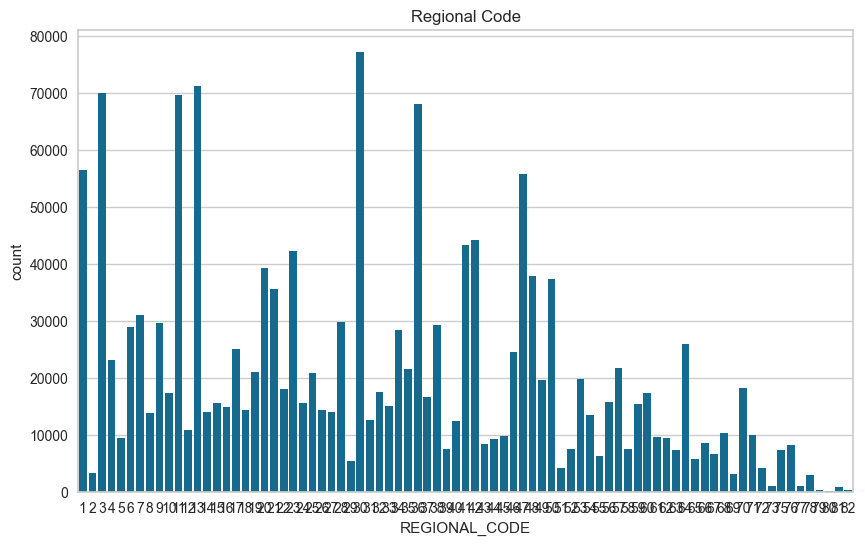

In [54]:
# plot a chart for REGIONAL CODE
plt.figure(figsize=(10, 6))
sns.countplot(x='REGIONAL_CODE', data=main)
plt.title('Regional Code')
plt.show()

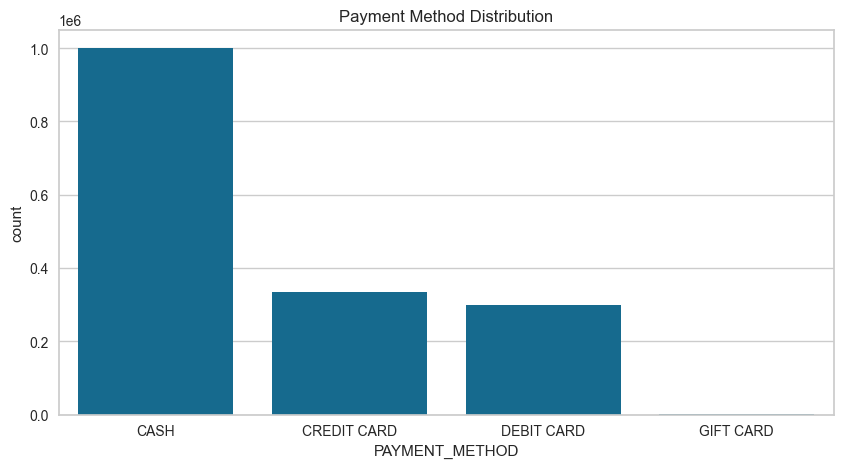

In [55]:
# plot the bar chart of PAYMENT_METHOD
plt.figure(figsize=(10, 5))
sns.countplot(data=main, x='PAYMENT_METHOD')
plt.title('Payment Method Distribution')
plt.show()



In [56]:
# categorize the PAYMENT_METHOD column into 5 categories
main['PAYMENT_METHOD_CATEGORY'] = None
main.loc[main['PAYMENT_METHOD'] == 'CASH', 'PAYMENT_METHOD_CATEGORY'] = '1'
main.loc[main['PAYMENT_METHOD'] == 'CHECK', 'PAYMENT_METHOD_CATEGORY'] = '2'
main.loc[main['PAYMENT_METHOD'] == 'CREDIT CARD', 'PAYMENT_METHOD_CATEGORY'] = '3'
main.loc[main['PAYMENT_METHOD'] == 'DEBIT CARD', 'PAYMENT_METHOD_CATEGORY'] = '4'
main.loc[main['PAYMENT_METHOD'] == 'GIFT CARD', 'PAYMENT_METHOD_CATEGORY'] = '5'

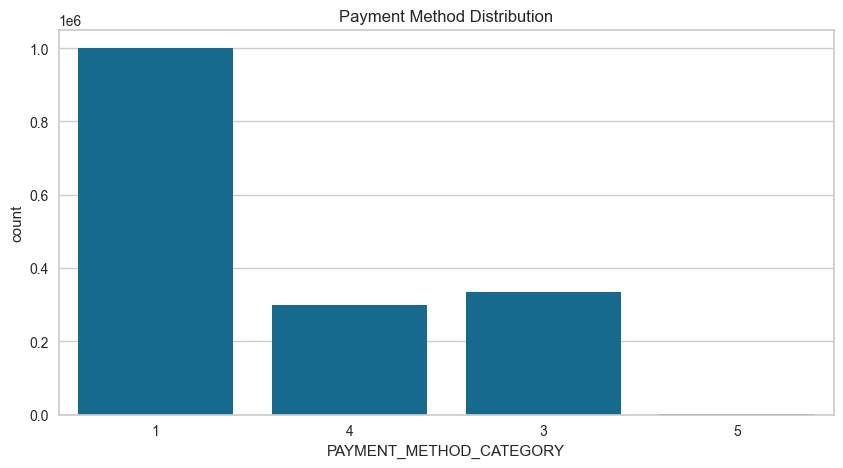

In [57]:
# plot the bar chart of PAYMENT_METHOD
plt.figure(figsize=(10, 5))
sns.countplot(data=main, x='PAYMENT_METHOD_CATEGORY')
plt.title('Payment Method Distribution')
plt.show()

In [58]:
# FREQUENCY CALCULATION
main['BillNo'] = range(1, len(main) + 1)

In [59]:
# FREQUENCY CALCULATION
freq= main.drop_duplicates(subset="BillNo").groupby(["CUSTOMER_ID"])[["BillNo"]].count()

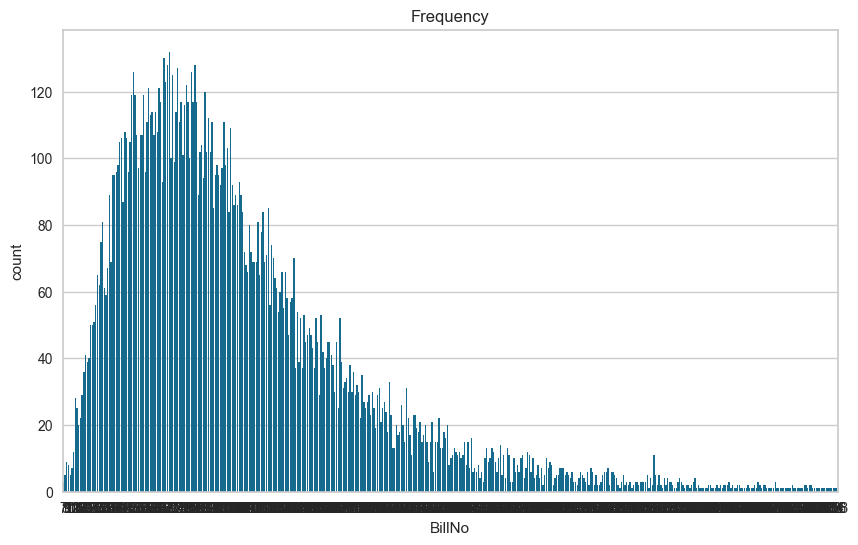

In [60]:
# create a chart for freq
plt.figure(figsize=(10, 6))
sns.countplot(x='BillNo', data=freq)
plt.title('Frequency')
plt.show()

In [61]:
freq.describe()

,BillNo
count,14893.000000
mean,109.948096
std,74.008594
min,7.000000
25%,60.000000
50%,92.000000
75%,139.000000
max,938.000000


In [62]:
# categorize the frequency column into 5 categories consider min is 7 and max is 938
main['FREQUENCY_CATEGORY'] = None
main.loc[main['BillNo'] <= 100, 'FREQUENCY_CATEGORY'] = '1'
main.loc[(main['BillNo'] > 100) & (main['BillNo'] <= 200), 'FREQUENCY_CATEGORY'] = '2'
main.loc[(main['BillNo'] > 200) & (main['BillNo'] <= 300), 'FREQUENCY_CATEGORY'] = '3'
main.loc[(main['BillNo'] > 300) & (main['BillNo'] <= 400), 'FREQUENCY_CATEGORY'] = '4'
main.loc[main['BillNo'] > 400, 'FREQUENCY_CATEGORY'] = '5'



In [63]:
# take the mode of frequency_category for each customer_id in a new table
freq_table = main.groupby('CUSTOMER_ID')['FREQUENCY_CATEGORY'].apply(lambda x: x.mode().iloc[0])


In [64]:
# RECENCY CALCULATION
#specific_date = datetime(2020, 1, 26)
main['DATE'] = pd.to_datetime(main['DATE'], errors='coerce')
recency = main.groupby(['CUSTOMER_ID']).agg({'DATE': lambda x:((specific_date-x.max()).days)})
recency

,DATE
CUSTOMER_ID,
AA00312188,24
AA00312390,1
AA00325975,1
AA00336843,14
AA00339761,23
...,...
YZ02653377,10
YZ03066972,38
YZ03638056,386


In [65]:
# DATE column in recent table should be named recency_score
recency.rename(columns = {'DATE': 'recency_score'}, inplace = True)


In [66]:
# recency_score shoult be converted to integer
recency['recency_score'] = recency['recency_score'].astype(int)


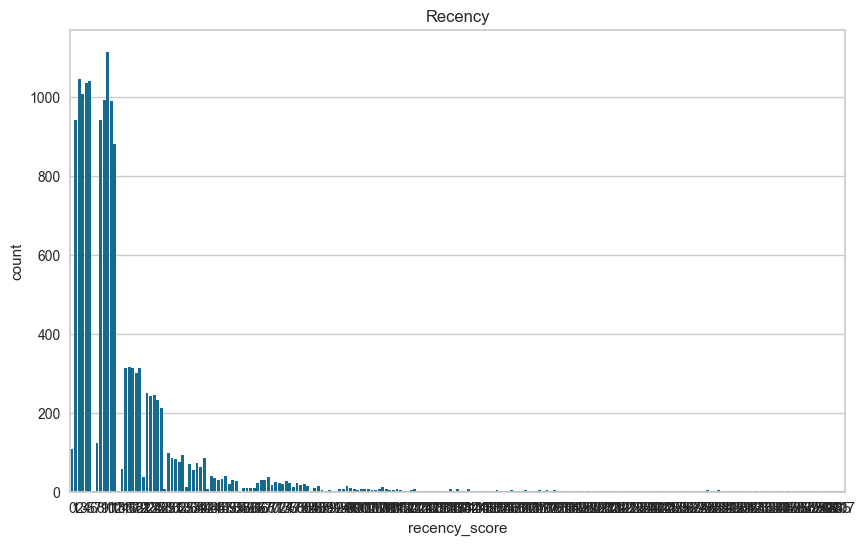

In [67]:
#plot a chart for recency
plt.figure(figsize=(10, 6))
sns.countplot(x='recency_score', data=recency)
plt.title('Recency')
plt.show()

In [68]:
recency.describe()

,recency_score
count,14893.000000
mean,17.060901
std,31.124249
min,0.000000
25%,4.000000
50%,10.000000
75%,17.000000
max,507.000000


In [69]:
# categorize the recency_score column into 4 categories consider min is 0 and max is 507
recency['RECENCY_CATEGORY'] = None
recency.loc[recency['recency_score'] <= 100, 'RECENCY_CATEGORY'] = '1'
recency.loc[(recency['recency_score'] > 100) & (recency['recency_score'] <= 200), 'RECENCY_CATEGORY'] = '2'
recency.loc[(recency['recency_score'] > 200) & (recency['recency_score'] <= 300), 'RECENCY_CATEGORY'] = '3'
recency.loc[recency['recency_score'] > 300, 'RECENCY_CATEGORY'] = '4'


In [70]:
# take the mode of recency_score for each customer in a new table
recency_table = recency.groupby('CUSTOMER_ID')['RECENCY_CATEGORY'].apply(lambda x: x.mode().iloc[0])

In [71]:
main['TRANSACTION_VALUE'] = None

# Iterate over each row
for index, row in main.iterrows():
    if row['TYPE_CATEGORY'] == 1 or row['TYPE_CATEGORY'] == 2:
        main.at[index, 'TRANSACTION_VALUE'] = abs(row['LIST_PRICE']) * abs(row['QUANTITY'])
    else:
        main.at[index, 'TRANSACTION_VALUE'] = -(abs(row['LIST_PRICE']) * abs(row['QUANTITY']))

main.head()

,CUSTOMER_ID,DATE,PRODUCT_ID,QUANTITY,LIST_PRICE,SPECIAL,OUTLET_ID,PAYMENT_METHOD,TIME,TOTAL_POINTS,...,LoyaltyPoint,Points_Spent,loyalty_score,TYPE,TYPE_CATEGORY,ORIGIN_CATEGORY,PAYMENT_METHOD_CATEGORY,BillNo,FREQUENCY_CATEGORY,TRANSACTION_VALUE
0,BF00404312,2020-01-17,1068,1.0,6.85,0,14,CASH,15:06:37,-3960,...,1,27720,1,BUY,2,1,1,1,1,6.85
1,BF00404312,2018-11-09,1068,1.0,6.65,0,14,CASH,18:27:53,315,...,0,27720,1,BUY,2,1,1,2,1,6.65
2,BF00404312,2020-01-17,94580,1.0,6.25,0,14,CASH,15:06:37,-3960,...,1,27720,1,BUY,2,1,1,3,1,6.25
3,BF00404312,2019-08-16,94580,1.0,6.25,0,14,CASH,18:49:52,565,...,0,27720,1,BUY,2,1,1,4,1,6.25
4,BF00404312,2019-11-10,94580,1.0,6.25,0,14,CASH,14:20:49,430,...,0,27720,1,BUY,2,1,1,5,1,6.25


In [72]:
# show the describe values for transaction value column
main['TRANSACTION_VALUE'] = main['TRANSACTION_VALUE'].astype(float)
main['TRANSACTION_VALUE'].describe()


count    1.637457e+06
mean     1.035158e+01
std      6.356112e+01
min     -8.464000e+03
25%      4.950000e+00
50%      7.250000e+00
75%      1.075000e+01
max      5.000000e+04
Name: TRANSACTION_VALUE, dtype: float64

In [73]:
# calculate the total transcation value fo each customer in a new table
total_transaction_value = main.groupby('CUSTOMER_ID')['TRANSACTION_VALUE'].sum()

# make total_transaction_value a new table
total_transaction_value_table = pd.DataFrame({'CUSTOMER_ID': total_transaction_value.index, 'Total_Transaction_Value': total_transaction_value.values})
total_transaction_value_table

,CUSTOMER_ID,Total_Transaction_Value
0,AA00312188,1040.45
1,AA00312390,687.95
2,AA00325975,1386.30
3,AA00336843,498.10
4,AA00339761,574.80
...,...,...
14888,YZ02653377,758.05
14889,YZ03066972,1308.05
14890,YZ03638056,75.75
14891,YZ04148156,173.15


In [74]:
total_transaction_value_table.describe()

,Total_Transaction_Value
count,14893.000000
mean,1138.136478
std,1771.028480
min,-6503.450000
25%,530.300000
50%,849.000000
75%,1352.300000
max,100820.300000


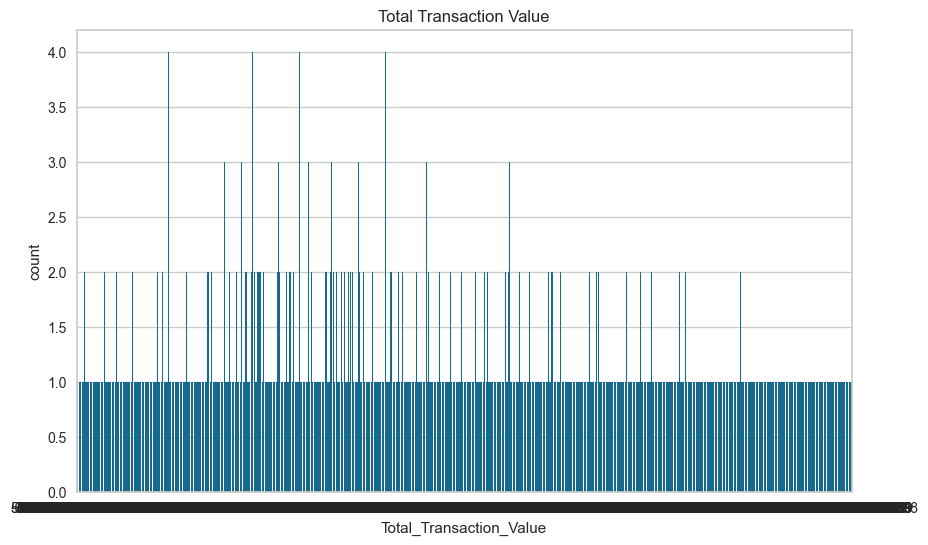

In [75]:
#plot the graph of total_transaction_value_table where min is -6503 and max is 100820

# make the graph reversed
plt.figure(figsize=(10, 6))
sns.countplot(x='Total_Transaction_Value', data=total_transaction_value_table)
plt.title('Total Transaction Value')
plt.show()




In [76]:
# categorize the total_transaction_value_table into 5 categories where min value is -6500 and max value is 100820
total_transaction_value_table['TRANSACTION_VALUE_CATEGORY'] = None
total_transaction_value_table.loc[total_transaction_value_table['Total_Transaction_Value'] <= 0, 'TRANSACTION_VALUE_CATEGORY'] = '1'
total_transaction_value_table.loc[(total_transaction_value_table['Total_Transaction_Value'] > 0) & (total_transaction_value_table['Total_Transaction_Value'] <= 20000), 'TRANSACTION_VALUE_CATEGORY'] = '2'
total_transaction_value_table.loc[(total_transaction_value_table['Total_Transaction_Value'] > 20000) & (total_transaction_value_table['Total_Transaction_Value'] <= 40000), 'TRANSACTION_VALUE_CATEGORY'] = '3'
total_transaction_value_table.loc[(total_transaction_value_table['Total_Transaction_Value'] > 40000) & (total_transaction_value_table['Total_Transaction_Value'] <= 60000), 'TRANSACTION_VALUE_CATEGORY'] = '4'
total_transaction_value_table.loc[total_transaction_value_table['Total_Transaction_Value'] > 60000, 'TRANSACTION_VALUE_CATEGORY'] = '5'



In [77]:
# calculate the mode of TRANSACTION_VALUE_CATEGORY per customer id in a new table
TVT = total_transaction_value_table.groupby('CUSTOMER_ID')['TRANSACTION_VALUE_CATEGORY'].apply(lambda x: x.mode().iloc[0])




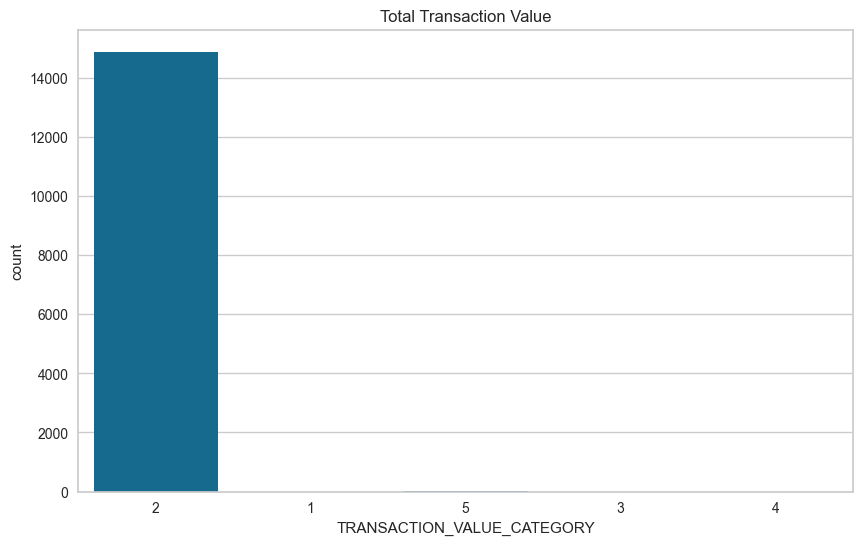

In [78]:
# graph the distribution of total_transaction_value_table
plt.figure(figsize=(10, 6))
sns.countplot(x='TRANSACTION_VALUE_CATEGORY', data=total_transaction_value_table)
plt.title('Total Transaction Value')
plt.show()

In [79]:
# calculate the average check per customer_id in a new table
average_check = main.groupby('CUSTOMER_ID')['TRANSACTION_VALUE'].mean()


In [80]:
average_check.describe()

count    14893.000000
mean        10.363673
std         18.395822
min        -31.116986
25%          7.590541
50%          8.860145
75%         10.777333
max       1147.521429
Name: TRANSACTION_VALUE, dtype: float64

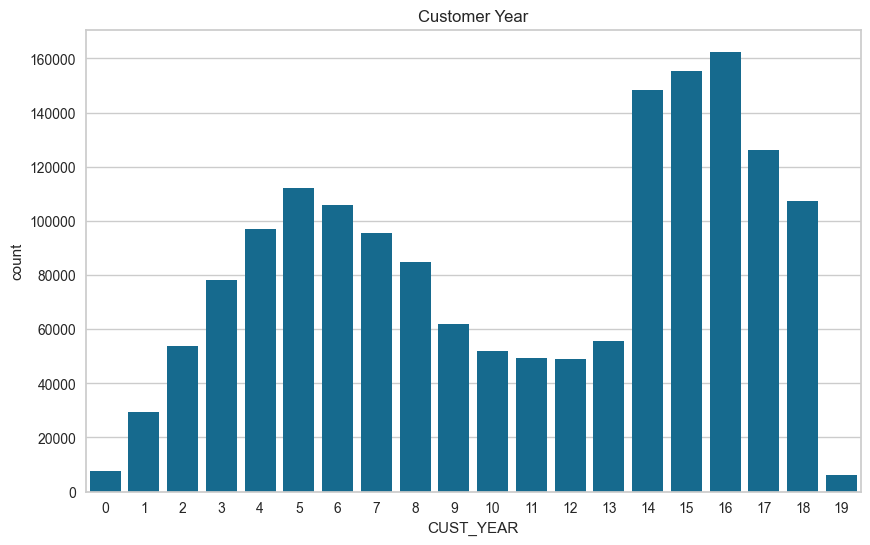

In [81]:
# create a graph for CUST_YEAR
plt.figure(figsize=(10, 6))
sns.countplot(x='CUST_YEAR', data=main)
plt.title('Customer Year')
plt.show()

In [82]:
# divide CUST_YEAR into 4 categories showing the longetivity of the customer in years
main['CUST_YEAR_CATEGORY'] = None
main.loc[main['CUST_YEAR'] <= 4, 'CUST_YEAR_CATEGORY'] = '1'
main.loc[(main['CUST_YEAR'] > 4) & (main['CUST_YEAR'] <= 9), 'CUST_YEAR_CATEGORY'] = '2'
main.loc[(main['CUST_YEAR'] > 9) & (main['CUST_YEAR'] <= 14), 'CUST_YEAR_CATEGORY'] = '3'
main.loc[main['CUST_YEAR'] > 14, 'CUST_YEAR_CATEGORY'] = '4'

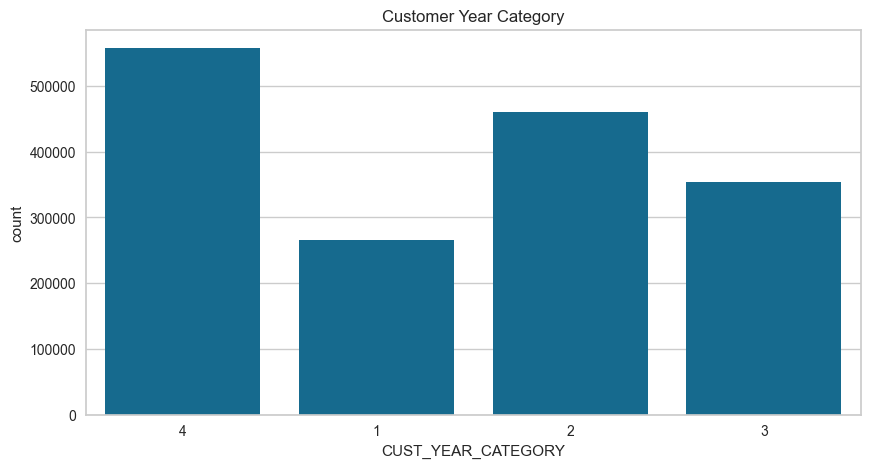

In [83]:
# plot the bar chart of CUST_YEAR_CATEGORY
plt.figure(figsize=(10, 5))
sns.countplot(data=main, x='CUST_YEAR_CATEGORY')
plt.title('Customer Year Category')
plt.show()


In [84]:
# divide Transaction Hour into 4 categories
main['Transaction_Hour_Category'] = None
main.loc[main['Transaction_Hour'] <= 6, 'Transaction_Hour_Category'] = '1'
main.loc[(main['Transaction_Hour'] > 6) & (main['Transaction_Hour'] <= 12), 'Transaction_Hour_Category'] = '2'
main.loc[(main['Transaction_Hour'] > 12) & (main['Transaction_Hour'] <= 18), 'Transaction_Hour_Category'] = '3'
main.loc[main['Transaction_Hour'] > 18, 'Transaction_Hour_Category'] = '4'

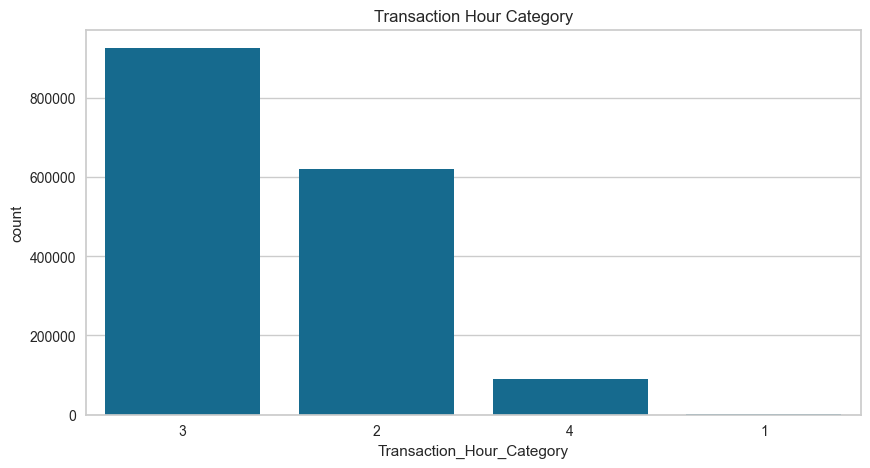

In [85]:
# plot the bar chart of Transaction_Hour_Category
plt.figure(figsize=(10, 5))
sns.countplot(data=main, x='Transaction_Hour_Category')
plt.title('Transaction Hour Category')
plt.show()

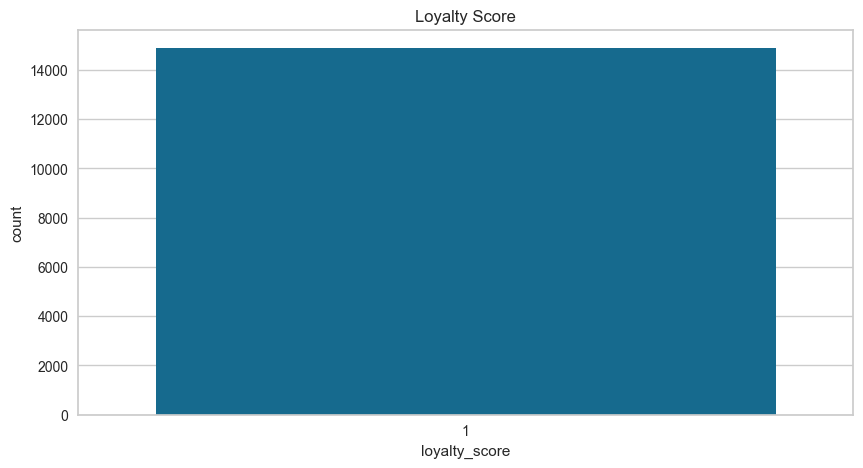

In [86]:
# plot points spent graph
plt.figure(figsize=(10, 5))
sns.countplot(data=loyalty, x='loyalty_score')
plt.title('Loyalty Score')
plt.show()

In [87]:
# categorize points_spent_table into 4 categories
points_spent_table['Points_Spent_Category'] = None
points_spent_table.loc[points_spent_table['Points_Spent'] <= 1000, 'Points_Spent_Category'] = '1'
points_spent_table.loc[(points_spent_table['Points_Spent'] > 1000) & (points_spent_table['Points_Spent'] <= 2000), 'Points_Spent_Category'] = '2'
points_spent_table.loc[(points_spent_table['Points_Spent'] > 2000) & (points_spent_table['Points_Spent'] <= 3000), 'Points_Spent_Category'] = '3'
points_spent_table.loc[points_spent_table['Points_Spent'] > 3000, 'Points_Spent_Category'] = '4'

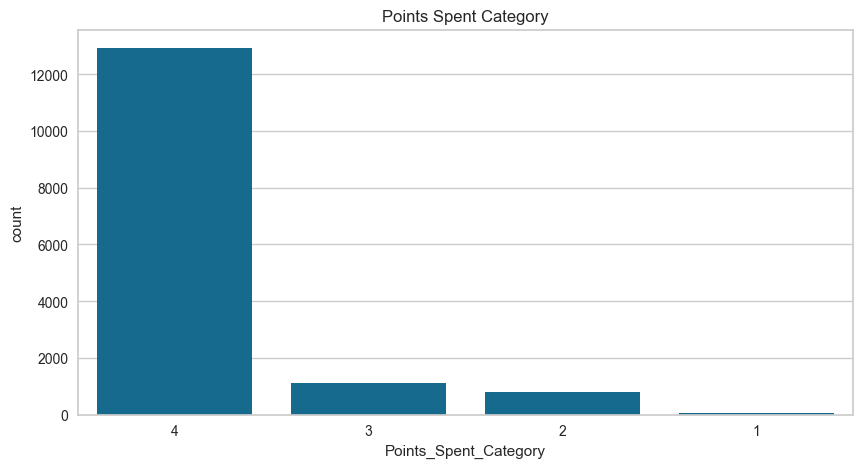

In [88]:
# plot points_spent_table 
plt.figure(figsize=(10, 5))
sns.countplot(data=points_spent_table, x='Points_Spent_Category')
plt.title('Points Spent Category')
plt.show()

In [89]:
main.head(5)

,CUSTOMER_ID,DATE,PRODUCT_ID,QUANTITY,LIST_PRICE,SPECIAL,OUTLET_ID,PAYMENT_METHOD,TIME,TOTAL_POINTS,...,loyalty_score,TYPE,TYPE_CATEGORY,ORIGIN_CATEGORY,PAYMENT_METHOD_CATEGORY,BillNo,FREQUENCY_CATEGORY,TRANSACTION_VALUE,CUST_YEAR_CATEGORY,Transaction_Hour_Category
0,BF00404312,2020-01-17,1068,1.0,6.85,0,14,CASH,15:06:37,-3960,...,1,BUY,2,1,1,1,1,6.85,4,3
1,BF00404312,2018-11-09,1068,1.0,6.65,0,14,CASH,18:27:53,315,...,1,BUY,2,1,1,2,1,6.65,4,3
2,BF00404312,2020-01-17,94580,1.0,6.25,0,14,CASH,15:06:37,-3960,...,1,BUY,2,1,1,3,1,6.25,4,3
3,BF00404312,2019-08-16,94580,1.0,6.25,0,14,CASH,18:49:52,565,...,1,BUY,2,1,1,4,1,6.25,4,3
4,BF00404312,2019-11-10,94580,1.0,6.25,0,14,CASH,14:20:49,430,...,1,BUY,2,1,1,5,1,6.25,4,3


In [90]:
# Calculate the percentage of SPECIAL column for each customer_id
percentage_loyalty = main.groupby('CUSTOMER_ID')['loyalty_score'].mean() * 100

# Round the values to 7 digits after the decimal point
percentage_special = percentage_loyalty.round(2)

# Create a new table with customer_id and percentage_special columns
percentage_loyalty_table = pd.DataFrame({'CUSTOMER_ID': percentage_loyalty.index, 'Percentage_Loyalty': percentage_loyalty.values})


# add a new column to percentage_special table where the value is 1 if that customer ever bought a special product, and 0 otherwise
percentage_loyalty_table['SPECIAL'] = percentage_loyalty_table['Percentage_Loyalty'].apply(lambda x: 1 if x > 0 else 0)

#show less rows for percentage_special_table
percentage_loyalty_table.head(20)

,CUSTOMER_ID,Percentage_Loyalty,SPECIAL
0,AA00312188,100.0,1
1,AA00312390,100.0,1
2,AA00325975,100.0,1
3,AA00336843,100.0,1
4,AA00339761,100.0,1
5,AA00339963,100.0,1
6,AA00353548,100.0,1
7,AA00367334,100.0,1
8,AA00395109,100.0,1
9,AA00403260,100.0,1


In [91]:
points_spent_table.head()

,CUSTOMER_ID,Points_Spent,Points_Spent_Category
0,AA00312188,8760,4
1,AA00312390,2240,3
2,AA00325975,80675,4
3,AA00336843,24255,4
4,AA00339761,4030,4


In [92]:
main['SPECIAL'] = main['SPECIAL'].astype(int)

In [93]:
# Calculate the percentage of SPECIAL column for each customer_id
percentage_special = main.groupby('CUSTOMER_ID')['SPECIAL'].mean() * 100

# Round the values to 7 digits after the decimal point
percentage_special = percentage_special.round(2)

# Create a new table with customer_id and percentage_special columns
percentage_special_table = pd.DataFrame({'CUSTOMER_ID': percentage_special.index, 'Percentage_SPECIAL': percentage_special.values})


# add a new column to percentage_special table where the value is 1 if that customer ever bought a special product, and 0 otherwise
percentage_special_table['SPECIAL'] = percentage_special_table['Percentage_SPECIAL'].apply(lambda x: 1 if x > 0 else 0)

#show less rows for percentage_special_table
percentage_special_table.head(20)

,CUSTOMER_ID,Percentage_SPECIAL,SPECIAL
0,AA00312188,0.00,0
1,AA00312390,0.00,0
2,AA00325975,0.00,0
3,AA00336843,0.00,0
4,AA00339761,0.00,0
5,AA00339963,0.00,0
6,AA00353548,0.00,0
7,AA00367334,0.00,0
8,AA00395109,0.00,0
9,AA00403260,0.00,0


In [94]:
# calculate the total quantity per customer_id in a new table
total_quantity = main.groupby('CUSTOMER_ID')['QUANTITY'].sum()

CREATING FINAL DATA FRAME WITH ALL NUMERICAL VALUES

In [95]:
#create a new data frame named final that contains only one column with unique customer_id values from the main data frame
final = pd.DataFrame(main['CUSTOMER_ID'].unique(), columns=['CUSTOMER_ID'])





In [96]:
final.head(10
           )

,CUSTOMER_ID
0,BF00404312
1,EB00404430
2,WD04132126
3,DK00406358
4,PZ00407092
5,ML00404852
6,BC03658193
7,QC00404498
8,YN00406844
9,VB00405533


In [97]:
# Weekday spent categorized and added to final
weekday_mode = main.groupby('CUSTOMER_ID')['Weekday'].apply(lambda x: x.mode()[0] if not x.empty else None).reset_index()
weekday_mode.columns = ['CUSTOMER_ID', 'MODE_WEEKDAY']
weekday_mode

,CUSTOMER_ID,MODE_WEEKDAY
0,AA00312188,3
1,AA00312390,5
2,AA00325975,5
3,AA00336843,3
4,AA00339761,4
...,...,...
14888,YZ02653377,3
14889,YZ03066972,3
14890,YZ03638056,5
14891,YZ04148156,1


In [98]:
final = final.merge(weekday_mode, how='inner', on=['CUSTOMER_ID'])

In [99]:
final.head()

,CUSTOMER_ID,MODE_WEEKDAY
0,BF00404312,4
1,EB00404430,4
2,WD04132126,1
3,DK00406358,5
4,PZ00407092,2


In [100]:
# Payment method categorized and added to final
payment_mode = main.groupby('CUSTOMER_ID')['PAYMENT_METHOD_CATEGORY'].apply(lambda x: x.mode()[0] if not x.empty else None).reset_index()
payment_mode.columns = ['CUSTOMER_ID', 'MODE_PAYMENT_METHOD']
payment_mode

,CUSTOMER_ID,MODE_PAYMENT_METHOD
0,AA00312188,1
1,AA00312390,1
2,AA00325975,4
3,AA00336843,1
4,AA00339761,1
...,...,...
14888,YZ02653377,1
14889,YZ03066972,1
14890,YZ03638056,1
14891,YZ04148156,1


In [101]:
final = final.merge(payment_mode, how='inner', on=['CUSTOMER_ID'])

In [102]:
final.head()

,CUSTOMER_ID,MODE_WEEKDAY,MODE_PAYMENT_METHOD
0,BF00404312,4,1
1,EB00404430,4,1
2,WD04132126,1,4
3,DK00406358,5,1
4,PZ00407092,2,1


In [103]:
# Origin categorized and added to final
origin_mode = main.groupby('CUSTOMER_ID')['ORIGIN_CATEGORY'].apply(lambda x: x.mode()[0] if not x.empty else None).reset_index()
origin_mode.columns = ['CUSTOMER_ID', 'MODE_ORIGIN']
origin_mode

,CUSTOMER_ID,MODE_ORIGIN
0,AA00312188,1
1,AA00312390,1
2,AA00325975,1
3,AA00336843,1
4,AA00339761,1
...,...,...
14888,YZ02653377,2
14889,YZ03066972,1
14890,YZ03638056,2
14891,YZ04148156,2


In [104]:
final = final.merge(origin_mode, how='inner', on=['CUSTOMER_ID'])

In [105]:
# calculate average negative_points per customer_id
average_negative_points = main.groupby('CUSTOMER_ID')['NEG_POINTS'].mean().abs().reset_index()
average_negative_points.columns = ['CUSTOMER_ID', 'AVERAGE_NEGATIVE_POINTS']
average_negative_points



,CUSTOMER_ID,AVERAGE_NEGATIVE_POINTS
0,AA00312188,85.882353
1,AA00312390,38.620690
2,AA00325975,393.536585
3,AA00336843,351.521739
4,AA00339761,68.305085
...,...,...
14888,YZ02653377,233.647059
14889,YZ03066972,204.172662
14890,YZ03638056,126.190476
14891,YZ04148156,46.956522


In [106]:
final = final.merge(average_negative_points, how='inner', on=['CUSTOMER_ID'])

In [107]:
final.head()

,CUSTOMER_ID,MODE_WEEKDAY,MODE_PAYMENT_METHOD,MODE_ORIGIN,AVERAGE_NEGATIVE_POINTS
0,BF00404312,4,1,1,252.000000
1,EB00404430,4,1,1,144.766355
2,WD04132126,1,4,1,319.949495
3,DK00406358,5,1,1,230.588235
4,PZ00407092,2,1,1,184.883721


In [108]:
final = final.merge(percentage_special_table, how='inner', on=['CUSTOMER_ID'])

In [109]:
final.head()

,CUSTOMER_ID,MODE_WEEKDAY,MODE_PAYMENT_METHOD,MODE_ORIGIN,AVERAGE_NEGATIVE_POINTS,Percentage_SPECIAL,SPECIAL
0,BF00404312,4,1,1,252.000000,0.0,0
1,EB00404430,4,1,1,144.766355,0.0,0
2,WD04132126,1,4,1,319.949495,0.0,0
3,DK00406358,5,1,1,230.588235,0.0,0
4,PZ00407092,2,1,1,184.883721,0.0,0


In [110]:
# create a new table and take the mode of each customer_id on CUST_YEAR_CATEGORY
cust_year_mode = main.groupby('CUSTOMER_ID')['CUST_YEAR_CATEGORY'].apply(lambda x: x.mode()[0] if not x.empty else None).reset_index()
cust_year_mode.columns = ['CUSTOMER_ID', 'MODE_CUST_YEAR']
cust_year_mode

,CUSTOMER_ID,MODE_CUST_YEAR
0,AA00312188,3
1,AA00312390,3
2,AA00325975,4
3,AA00336843,2
4,AA00339761,4
...,...,...
14888,YZ02653377,2
14889,YZ03066972,2
14890,YZ03638056,2
14891,YZ04148156,1


In [111]:
# bring CUST_YEAR_CATEGORY values from main data frame to final data frame on Customer_id
final = final.merge(cust_year_mode, how='inner', on=['CUSTOMER_ID'])

In [112]:
final.head()

,CUSTOMER_ID,MODE_WEEKDAY,MODE_PAYMENT_METHOD,MODE_ORIGIN,AVERAGE_NEGATIVE_POINTS,Percentage_SPECIAL,SPECIAL,MODE_CUST_YEAR
0,BF00404312,4,1,1,252.000000,0.0,0,4
1,EB00404430,4,1,1,144.766355,0.0,0,4
2,WD04132126,1,4,1,319.949495,0.0,0,1
3,DK00406358,5,1,1,230.588235,0.0,0,2
4,PZ00407092,2,1,1,184.883721,0.0,0,3


In [113]:
# create a new table and take the mode of Transaction_Hour_Category for each CUSTOMER_ID
transaction_hour_mode = main.groupby('CUSTOMER_ID')['Transaction_Hour_Category'].apply(lambda x: x.mode()[0] if not x.empty else None).reset_index()
transaction_hour_mode.columns = ['CUSTOMER_ID', 'MODE_TRANSACTION_HOUR']
transaction_hour_mode

,CUSTOMER_ID,MODE_TRANSACTION_HOUR
0,AA00312188,3
1,AA00312390,3
2,AA00325975,2
3,AA00336843,3
4,AA00339761,3
...,...,...
14888,YZ02653377,3
14889,YZ03066972,2
14890,YZ03638056,3
14891,YZ04148156,3


In [114]:
final = final.merge(transaction_hour_mode, how='inner', on=['CUSTOMER_ID'])

In [115]:
# take the average of total_quantity per customer_id
average_quantity = main.groupby('CUSTOMER_ID')['QUANTITY'].mean().reset_index()
average_quantity.columns = ['CUSTOMER_ID', 'AVERAGE_QUANTITY']
average_quantity


,CUSTOMER_ID,AVERAGE_QUANTITY
0,AA00312188,1.205882
1,AA00312390,1.344828
2,AA00325975,1.019512
3,AA00336843,1.028986
4,AA00339761,1.135593
...,...,...
14888,YZ02653377,1.070588
14889,YZ03066972,1.143885
14890,YZ03638056,1.047619
14891,YZ04148156,1.000000


In [116]:
# merge average_quantity with final
final = final.merge(average_quantity, how='inner', on=['CUSTOMER_ID'])

In [117]:
final = final.merge(freq_table, how='inner', on=['CUSTOMER_ID'])

In [118]:
final = final.merge(recency_table, how='inner', on=['CUSTOMER_ID'])

In [119]:
# merge average_check with final table per customer id
final = final.merge(average_check, how='inner', on=['CUSTOMER_ID'])

In [120]:
final = final.merge(loyalty_final, how='inner', on=['CUSTOMER_ID'])

In [121]:
final.head()

,CUSTOMER_ID,MODE_WEEKDAY,MODE_PAYMENT_METHOD,MODE_ORIGIN,AVERAGE_NEGATIVE_POINTS,Percentage_SPECIAL,SPECIAL,MODE_CUST_YEAR,MODE_TRANSACTION_HOUR,AVERAGE_QUANTITY,FREQUENCY_CATEGORY,RECENCY_CATEGORY,TRANSACTION_VALUE,LoyaltyPoint
0,BF00404312,4,1,1,252.000000,0.0,0,4,3,1.181818,1,1,9.828182,0.063636
1,EB00404430,4,1,1,144.766355,0.0,0,4,3,1.018692,2,1,7.463084,0.046729
2,WD04132126,1,4,1,319.949495,0.0,0,1,3,1.444444,3,1,21.132323,0.050505
3,DK00406358,5,1,1,230.588235,0.0,0,2,3,1.558824,4,1,11.442647,0.051471
4,PZ00407092,2,1,1,184.883721,0.0,0,3,2,1.015504,5,1,7.265891,0.046512


In [122]:
# show the row count of final
final.shape


(14893, 14)

In [123]:
# show columns for final
final.columns


Index(['CUSTOMER_ID', 'MODE_WEEKDAY', 'MODE_PAYMENT_METHOD', 'MODE_ORIGIN',
       'AVERAGE_NEGATIVE_POINTS', 'Percentage_SPECIAL', 'SPECIAL',
       'MODE_CUST_YEAR', 'MODE_TRANSACTION_HOUR', 'AVERAGE_QUANTITY',
       'FREQUENCY_CATEGORY', 'RECENCY_CATEGORY', 'TRANSACTION_VALUE',
       'LoyaltyPoint'],
      dtype='object')

In [124]:
# create a copy of RFM named RFM1 
final1 = final.copy()

#drop the CUSTOMER_ID
final1.drop(['CUSTOMER_ID'], axis=1, inplace=True)




In [125]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled=scaler.fit_transform(final1)

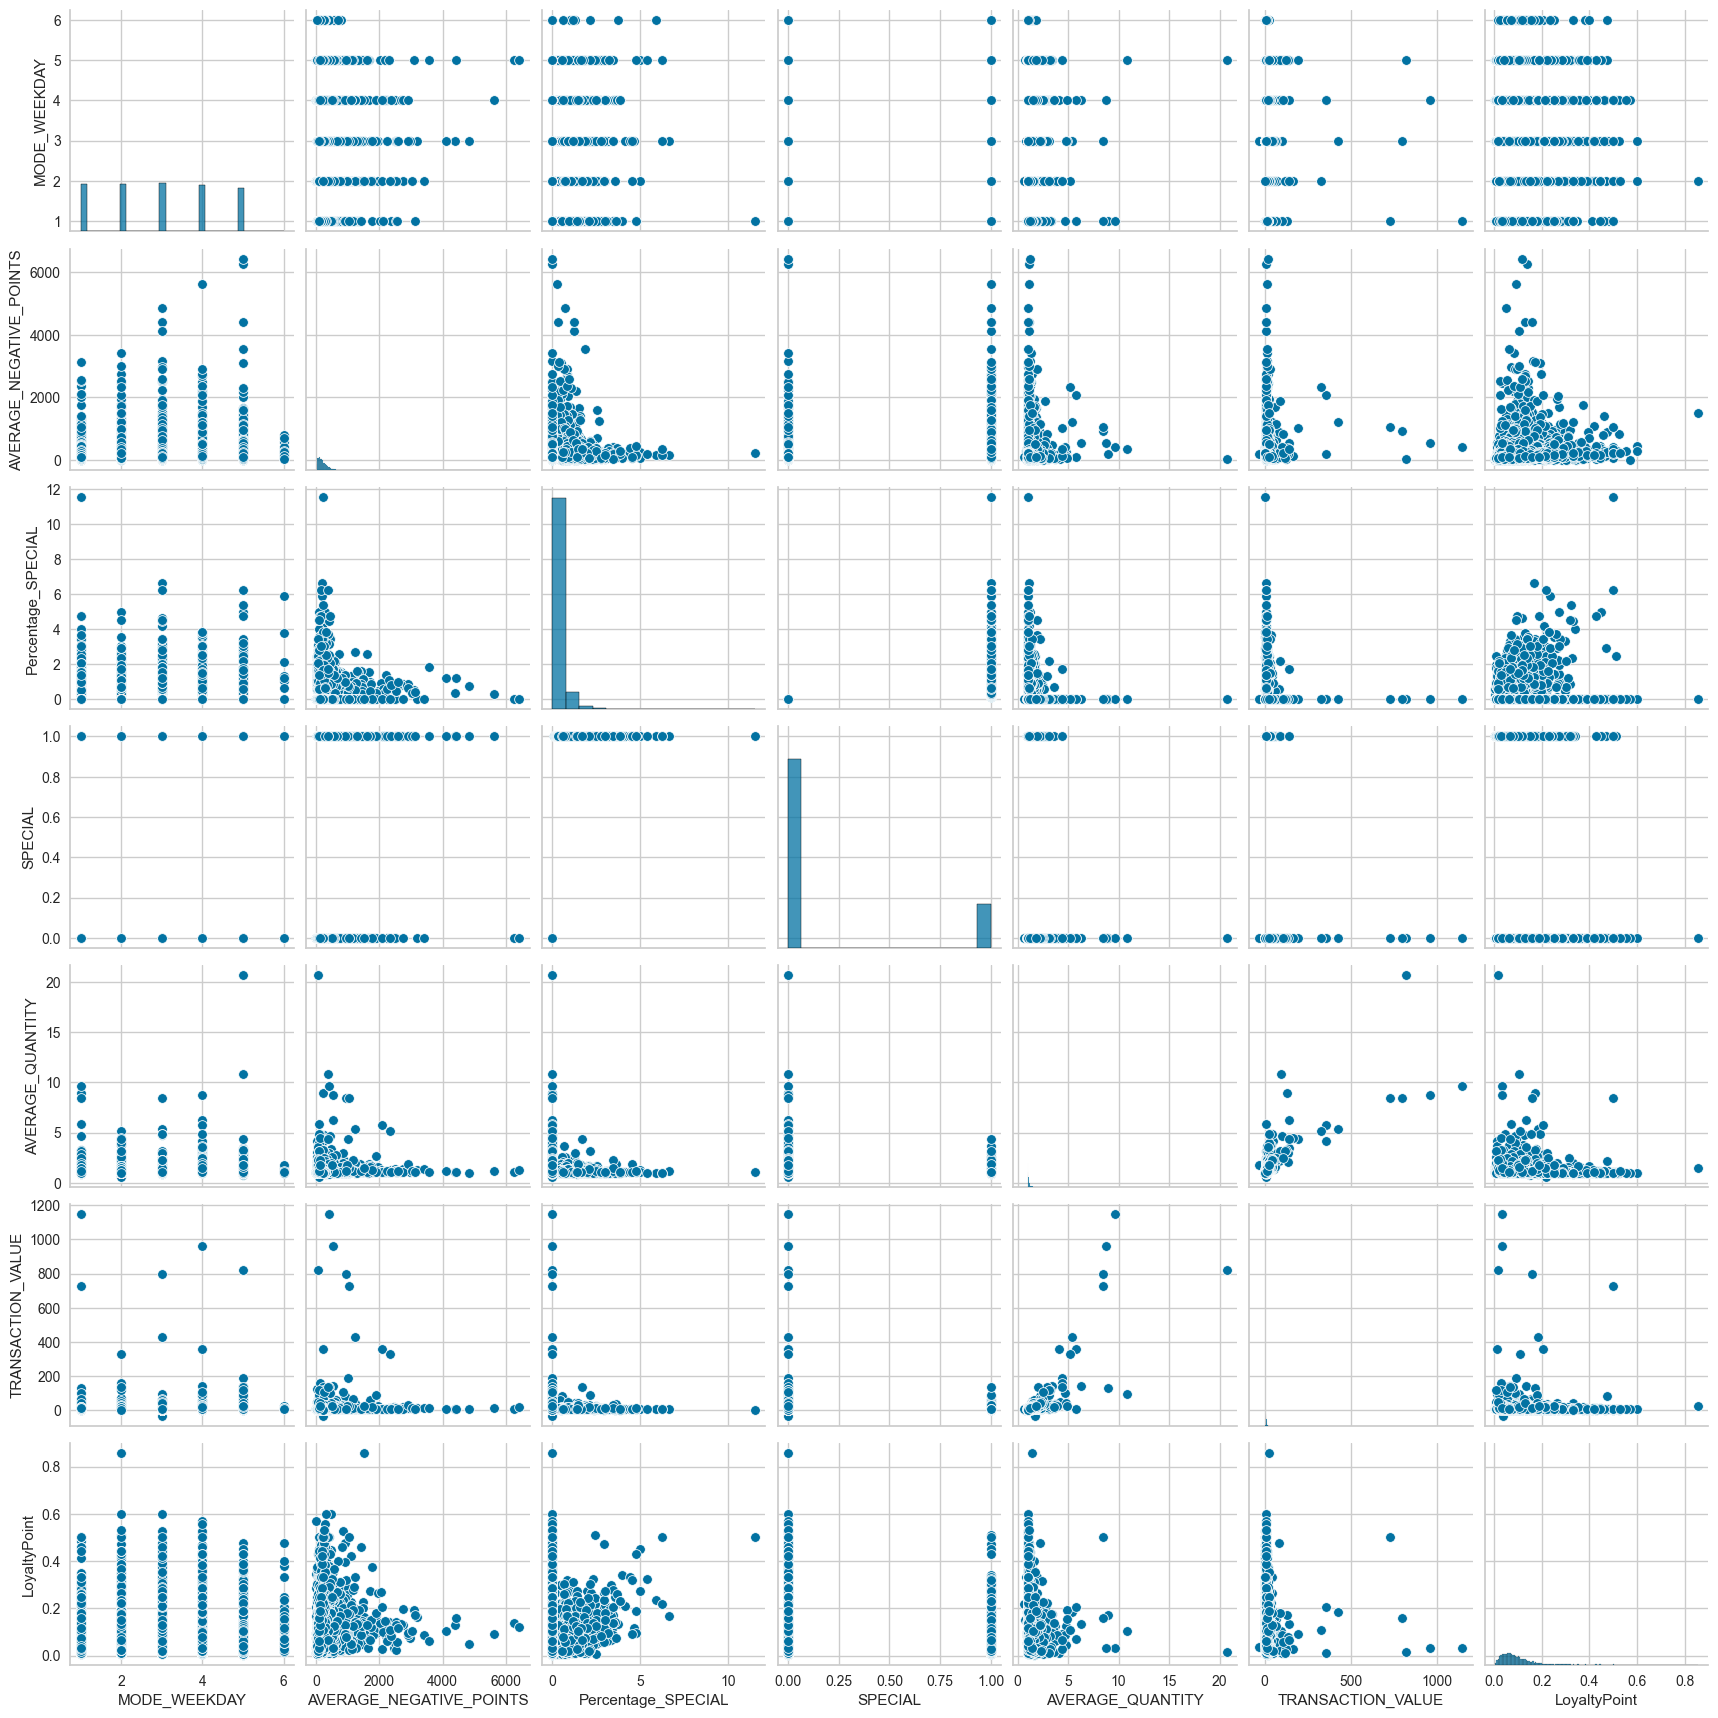

In [126]:
# plot a scatter graph for final1
sns.pairplot(final1)
plt.show()

In [127]:
from sklearn.decomposition import PCA


In [128]:
pca = PCA()

# fit PCA
pca.fit(scaled)
# PCA features
features = range(pca.n_components_)
# PCA transformed data
data_pca = pca.transform(scaled)
pca.explained_variance_ratio_

array([0.14666916, 0.1350416 , 0.12525702, 0.08967924, 0.08487077,
       0.07730842, 0.07651022, 0.07261389, 0.06426696, 0.05191979,
       0.04082786, 0.02022006, 0.014815  ])

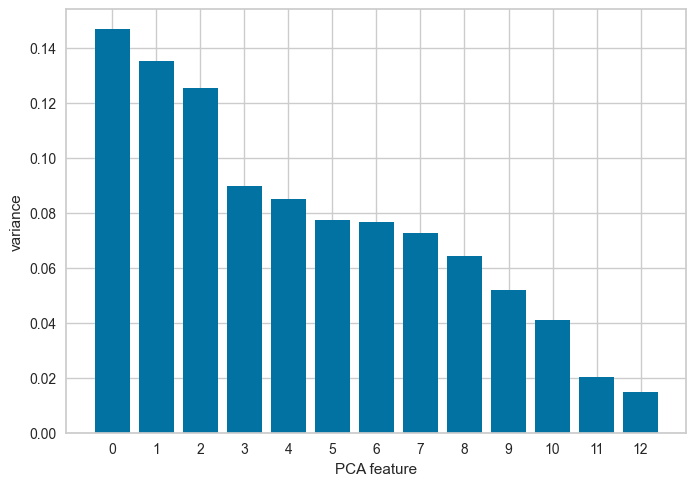

In [129]:
plt.bar(features, pca.explained_variance_ratio_)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('PCA feature')
plt.show()

In [130]:
#pca = PCA (n_components=7)
#scaled = pca.fit_transform(scaled)

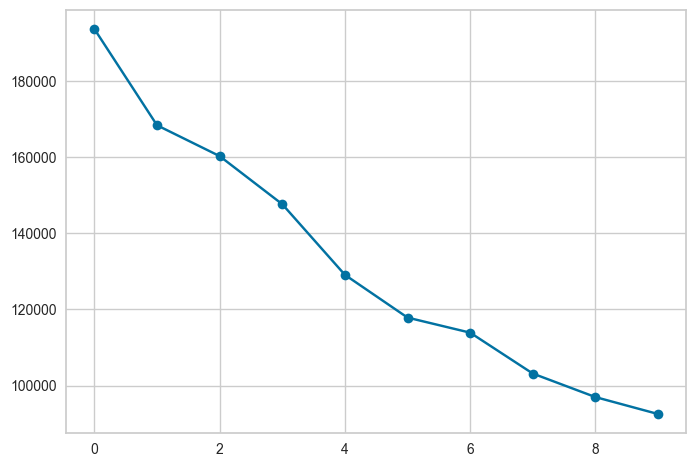

In [131]:
from sklearn.cluster import KMeans

inertia = []
for i in np.arange(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(scaled)
    inertia.append(kmeans.inertia_)
    
import matplotlib.pyplot as plt    
plt.plot(inertia,marker="o")

In [132]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score 
from sklearn.cluster import KMeans
from sklearn import metrics

KMEANS WITH NORMAL DISTANCE METRIC BUT DIFFERENT PERFORMANCE METRICS

Number of clusters: 3
Silhouette score: 0.646
Davies Bouldin Score: 0.538
Calinski-Harabasz Score: [17860.95487654457]
---------------------------------
Number of clusters: 4
Silhouette score: 0.608
Davies Bouldin Score: 0.535
Calinski-Harabasz Score: [17860.95487654457, 21459.252519565318]
---------------------------------
Number of clusters: 5
Silhouette score: 0.585
Davies Bouldin Score: 0.565
Calinski-Harabasz Score: [17860.95487654457, 21459.252519565318, 23422.049177923716]
---------------------------------
Number of clusters: 6
Silhouette score: 0.569
Davies Bouldin Score: 0.505
Calinski-Harabasz Score: [17860.95487654457, 21459.252519565318, 23422.049177923716, 30131.830903259197]
---------------------------------
Number of clusters: 7
Silhouette score: 0.553
Davies Bouldin Score: 0.507
Calinski-Harabasz Score: [17860.95487654457, 21459.252519565318, 23422.049177923716, 30131.830903259197, 34549.331365879974]
---------------------------------
Number of clusters: 8
Silhouette sc

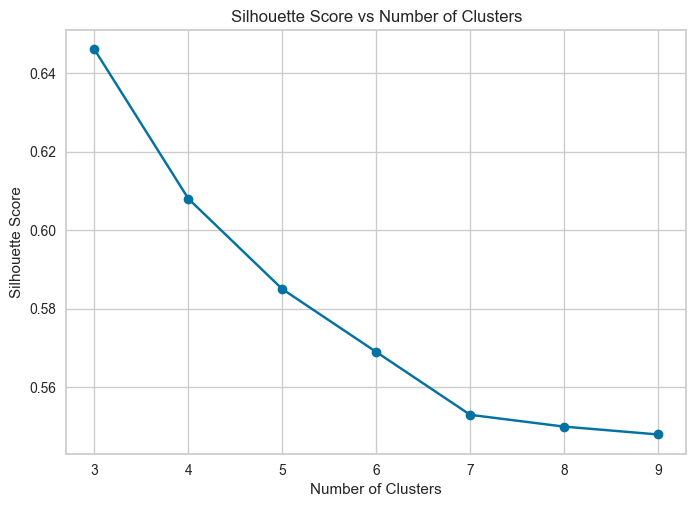

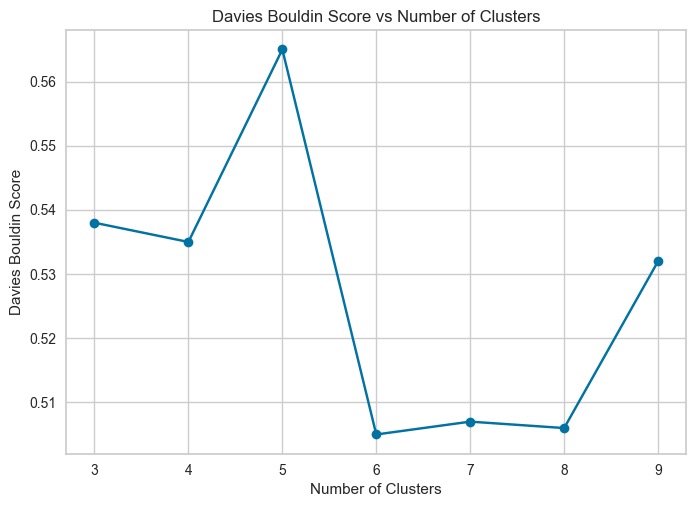

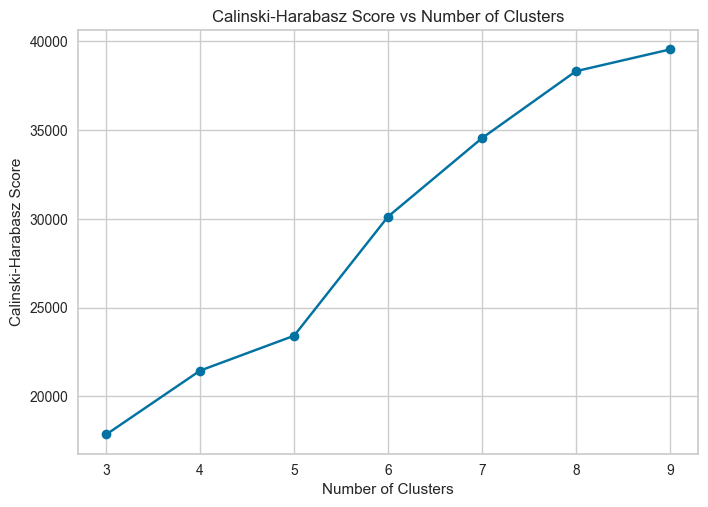

In [133]:
# Select the features for clustering
features = final1[['MODE_WEEKDAY', 'MODE_PAYMENT_METHOD', 'MODE_ORIGIN', 'AVERAGE_NEGATIVE_POINTS', 'Percentage_SPECIAL', 'SPECIAL', 'MODE_CUST_YEAR', 'MODE_TRANSACTION_HOUR', 'AVERAGE_QUANTITY', 'FREQUENCY_CATEGORY', 'RECENCY_CATEGORY', 'TRANSACTION_VALUE', 'LoyaltyPoint']]

# Define a list to store the silhouette scores
silhouette_scores = []

# Define a list to store the Davies Bouldin scores
davies_bouldin_scores = []

# Define a list to store the Calinski-Harabasz scores
CH_scores = []

# Define a range of cluster numbers to try
cluster_range = range(3, 10)

# Iterate over the cluster range
for n_clusters in cluster_range:
    # Perform clustering using KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(features)

    # Get the cluster labels
    cluster_labels = kmeans.labels_

    # Add the cluster labels to the dataframe
    final1['Cluster'] = cluster_labels

    # Calculate the silhouette score
    silhouette_score = metrics.silhouette_score(features, cluster_labels, metric='euclidean').round(3)
    silhouette_scores.append(silhouette_score)

    # Calculate the Davies Bouldin score
    davies_bouldin_score = metrics.davies_bouldin_score(features, cluster_labels).round(3)
    davies_bouldin_scores.append(davies_bouldin_score)

    # Calculate the Calinski-Harabasz score
    CH_score = calinski_harabasz_score(features, cluster_labels)
    CH_scores.append(CH_score)

    # Print the silhouette score and Davies Bouldin score for the current number of clusters
    print("Number of clusters: {}".format(n_clusters))
    print("Silhouette score: {}".format(silhouette_score))
    print("Davies Bouldin Score: {}".format(davies_bouldin_score))
    print("Calinski-Harabasz Score: {}".format(CH_scores))
    print("---------------------------------")

# Plot the silhouette scores and Davies Bouldin scores
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()

plt.plot(cluster_range, davies_bouldin_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies Bouldin Score')
plt.title('Davies Bouldin Score vs Number of Clusters')
plt.show()

plt.plot(cluster_range, CH_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski-Harabasz Score')
plt.title('Calinski-Harabasz Score vs Number of Clusters')
plt.show()


Different distance metrics for KMEANS

In [134]:
from pyclustering.utils.metric import distance_metric
from pyclustering.cluster.center_initializer import random_center_initializer
from pyclustering.cluster.encoder import type_encoding
from pyclustering.cluster.encoder import cluster_encoder
from sklearn.metrics.cluster import contingency_matrix
from yellowbrick.cluster import KElbowVisualizer

In [136]:
# Instantiate the clustering model and visualizer
#model = KMeans()
#visualizer = KElbowVisualizer(model, k=(3, 10))

#visualizer.fit(final1) # Fit the data to the visualizer
#visualizer.show() # Finalize and render the figure
#plt.show()

In [ ]:
# instatiate KMeans class and set the number of clusters
km_model = KMeans(n_clusters=3, random_state=42)

# call fit method with data 
km = km_model.fit_predict(final1)

# coordinates of cluster center
centroids = km_model.cluster_centers_ 

# cluster label for each data point
labels = km_model.labels_ 

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(
    final1[km == 0, 0], final1[km == 0, 1],
    s=25, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    final1[km == 1, 0], final1[km == 1, 1],
    s=25, c='yellow',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    final1[km == 2, 0], final1[km == 2, 1],
    s=25, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# visualise centroids
plt.scatter(
    centroids[:, 0], centroids[:, 1],
    s=300, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [ ]:
def purity_score(final1):
    # compute contingency matrix (also called confusion matrix)
    confusion_matrix = contingency_matrix(final1)
    # return purity
    return np.sum(np.amax(confusion_matrix, axis=0)) / np.sum(confusion_matrix)

# Report Purity Score
purity = purity_score(final1, labels)
print(f"The purity score is {round(purity*100, 2)}%")

In [ ]:
# define dictionary for distance measures
distance_measures = {'euclidean': 0, 'squared euclidean': 1, 'manhattan': 2, 'chebyshev': 3, 
                    'canberra': 5, 'chi-square': 6}

# function defined to compute purity score using pyclustering for various distance measures
def pyPurity(dist_measure):
    initial_centers = random_center_initializer(final1, 3, random_state=5).initialize()
    # instance created for respective distance metric
    instanceKm = kmeans(final1, initial_centers=initial_centers, metric=distance_metric(dist_measure))
    # perform cluster analysis
    instanceKm.process()
    # cluster analysis results - clusters and centers
    pyClusters = instanceKm.get_clusters()
    pyCenters = instanceKm.get_centers()
    # enumerate encoding type to index labeling to get labels
    pyEncoding = instanceKm.get_cluster_encoding()
    pyEncoder = cluster_encoder(pyEncoding, pyClusters, final1)
    pyLabels = pyEncoder.set_encoding(0).get_clusters()
    # function purity score is defined in previous section
    return purity_score(final1, pyLabels)

# print results
for measure, value in distance_measures.items():
    print(f"The purity score for {measure} distance is {round(pyPurity(value)*100, 2)}%")

HIERARCHICAL CLUSTERING

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

In [ ]:
model = AgglomerativeClustering(n_clusters=None,distance_threshold=0)

In [ ]:
cluster_labels = model.fit_predict(final1)
cluster_labels

In [ ]:
linkage_matrix = hierarchy.linkage(model.children_)
linkage_matrix[:][:5]

In [ ]:
plt.figure(figsize=(30,10))
hierarchy.set_link_color_palette(['r','grey', 'b', 'grey', 'm', 'grey', 'g', 'grey', 'orange']) # set colors for the clusters
dn = hierarchy.dendrogram(linkage_matrix,truncate_mode='level',p=15, color_threshold=23)

In [ ]:
# do hierarchical clustering for the data table final
silhouette_scores = []
for i in range(2, 11):
    model = AgglomerativeClustering(n_clusters=i)
    cluster_labels = model.fit_predict(scaled)
    silhouette_scores.append(silhouette_score(scaled, cluster_labels))


In [141]:
final1.head()

,MODE_WEEKDAY,MODE_PAYMENT_METHOD,MODE_ORIGIN,AVERAGE_NEGATIVE_POINTS,Percentage_SPECIAL,SPECIAL,MODE_CUST_YEAR,MODE_TRANSACTION_HOUR,AVERAGE_QUANTITY,FREQUENCY_CATEGORY,RECENCY_CATEGORY,TRANSACTION_VALUE,LoyaltyPoint,Cluster
0,4,1,1,252.000000,0.0,0,4,3,1.181818,1,1,9.828182,0.063636,5
1,4,1,1,144.766355,0.0,0,4,3,1.018692,2,1,7.463084,0.046729,7
2,1,4,1,319.949495,0.0,0,1,3,1.444444,3,1,21.132323,0.050505,5
3,5,1,1,230.588235,0.0,0,2,3,1.558824,4,1,11.442647,0.051471,7
4,2,1,1,184.883721,0.0,0,3,2,1.015504,5,1,7.265891,0.046512,7


In [145]:
X = final1.iloc[:].values
X

array([[4, '1', '1', ..., 9.828181818181818, 0.06363636363636363, 5],
       [4, '1', '1', ..., 7.463084112149533, 0.04672897196261682, 7],
       [1, '4', '1', ..., 21.13232323232323, 0.050505050505050504, 5],
       ...,
       [1, '1', '1', ..., 12.576315789473684, 0.15789473684210525, 1],
       [5, '1', '3', ..., 25.146875, 0.1875, 1],
       [1, '1', '2', ..., 727.75, 0.5, 8]], dtype=object)

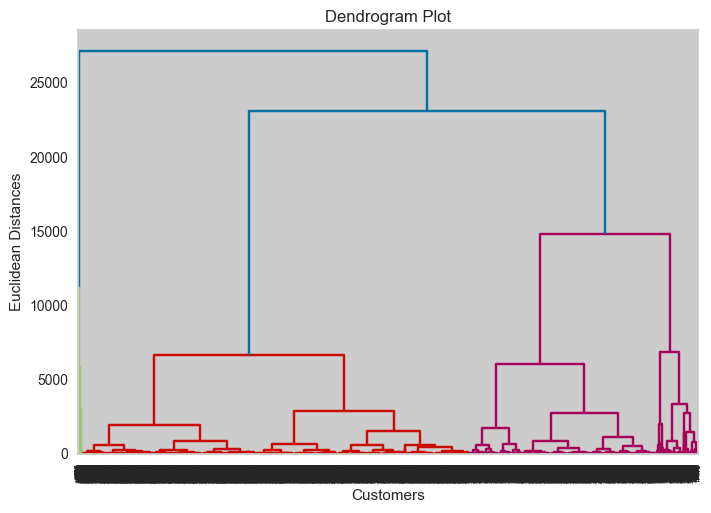

In [155]:
from matplotlib import pyplot as mtp
import scipy.cluster.hierarchy as shc  
dendro = shc.dendrogram(shc.linkage(X, method="ward"))  
mtp.title("Dendrogram Plot")  
mtp.ylabel("Euclidean Distances")  
mtp.xlabel("Customers")  
mtp.xticks(rotation=90)  # Rotate x-axis labels for better visibility
mtp.show()


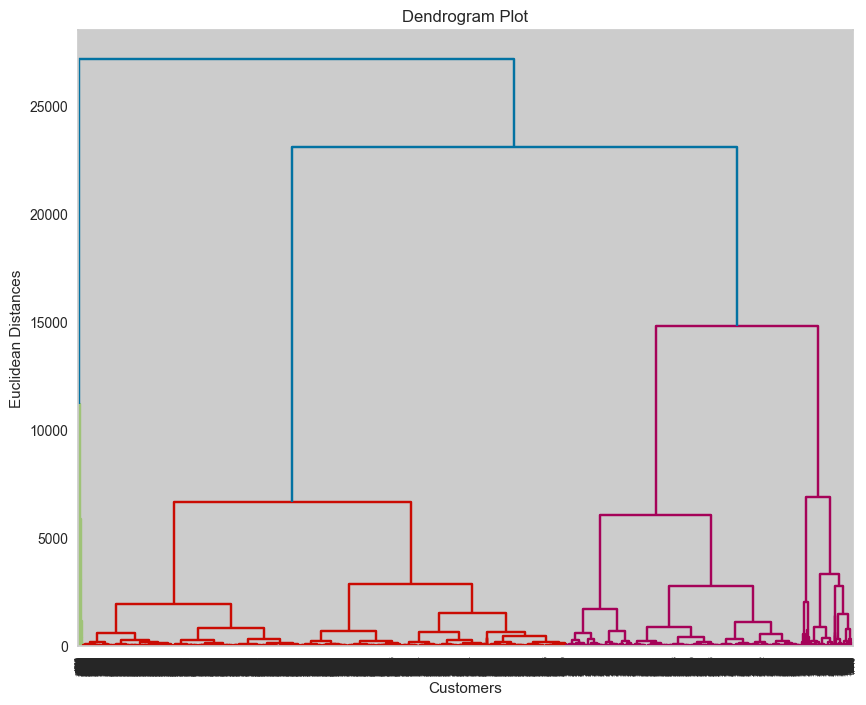

In [156]:
from matplotlib import pyplot as mtp
import scipy.cluster.hierarchy as shc  

# Adjust figure size
mtp.figure(figsize=(10, 8))

dendro = shc.dendrogram(shc.linkage(X, method="ward"))  
mtp.title("Dendrogram Plot")  
mtp.ylabel("Euclidean Distances")  
mtp.xlabel("Customers")  
mtp.show()


In [149]:
from sklearn.cluster import AgglomerativeClustering  

In [152]:

hc= AgglomerativeClustering(n_clusters=5,metric='euclidean', linkage='ward')  
y_pred= hc.fit_predict(X)  
y_pred

array([1, 2, 1, ..., 2, 2, 0], dtype=int64)

In [ ]:
hc1= AgglomerativeClustering(n_clusters=5,metric='manhattan', linkage='ward')  
y_pred1= hc1.fit_predict(X)  
y_pred1

In [ ]:
hc2= AgglomerativeClustering(n_clusters=5,metric='cosine', linkage='ward')  
y_pred2= hc2.fit_predict(X)  
y_pred2

In [ ]:
X_c = X.copy() # copy data
X_c['cluster'] = y_pred #append cluster label form model prediction to new dataset
X_c.head()

In [ ]:
plt.figure(figsize = (12, 8))
plt.scatter(X_c.loc[X_c['cluster'] == 0, 'Annual Income'], X_c.loc[X_c['cluster'] == 0, 'Spending Score'], c = 'red', label = 'Cluster 0')
plt.scatter(X_c.loc[X_c['cluster'] == 1, 'Annual Income'], X_c.loc[X_c['cluster'] == 1, 'Spending Score'], c = 'blue', label = 'Cluster 1')
plt.scatter(X_c.loc[X_c['cluster'] == 2, 'Annual Income'], X_c.loc[X_c['cluster'] == 2, 'Spending Score'], c = 'magenta', label = 'Cluster 2')
plt.scatter(X_c.loc[X_c['cluster'] == 3, 'Annual Income'], X_c.loc[X_c['cluster'] == 3, 'Spending Score'], c = 'green', label = 'Cluster 3')
plt.scatter(X_c.loc[X_c['cluster'] == 4, 'Annual Income'], X_c.loc[X_c['cluster'] == 4, 'Spending Score'], c = 'cyan', label = 'Cluster 4')
plt.title('Hierarchical Clustering Customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

not correct below

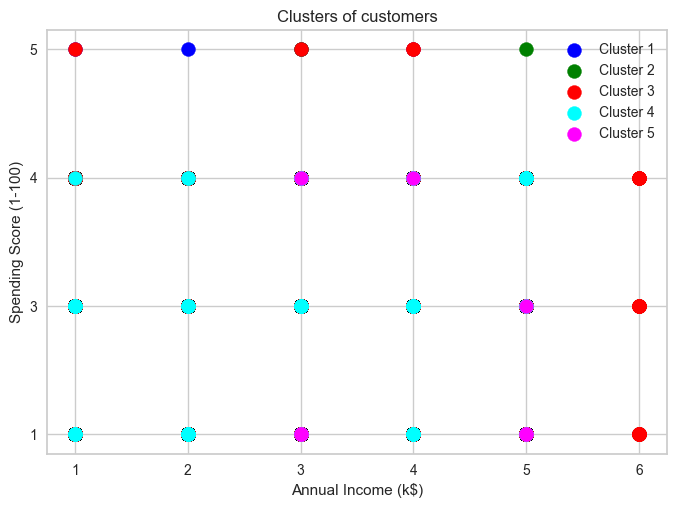

In [153]:
mtp.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')  
mtp.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s = 100, c = 'green', label = 'Cluster 2')  
mtp.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], s = 100, c = 'red', label = 'Cluster 3')  
mtp.scatter(X[y_pred == 3, 0], X[y_pred == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')  
mtp.scatter(X[y_pred == 4, 0], X[y_pred == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')  
mtp.title('Clusters of customers')  
mtp.xlabel('Annual Income (k$)')  
mtp.ylabel('Spending Score (1-100)')  
mtp.legend()  
mtp.show()